# Credit Score Classification

## Problem Description

#### Problem Statement
Many companies, especially financial institutions, often need a customer's credit score to determine what products or services to offer them and at what prices.

The goal of this project is to build a machine learning model that can classify a customer as having a **Good**, **Standard**, or **Poor** credit score given their credit-related information such as income and number of loans. This is a multi-class classification problem. The project will first cleanup and analyze the credit-related data given and then build a few different machine learning models to determine which one performs the best.

#### Data Source
Data is obtained from Kaggle under Public Domain license. 

Note: the data file is bigger than 25MB. In the Git repository, there's a compressed .zip version.

##### Citation:
Author Unknown (CC0: Public Domain), (Year created unknown), *Credit score classification*, Retrieved February 27, 2014 from https://www.kaggle.com/datasets/parisrohan/credit-score-classification?select=train.csv

#### Project Outline
1. **Data Cleanup**: Going through each feature to fix NaN fields using mean, mode, or dropping, fix data type, delete outliers, changing categorical features into integer
2. **EDA**: using correlation matrix, pair plot, box plot, and chi square test to detect correlations and irrelevant data
3. **Building Models**: Logistic Regression, K Nearest Neighbor, Decision Tree, Decision Tree with AdaBoost, and Decision Tree with Random Forest. Trying different parameters for optimum accuracy
4. **Making conclusions**: based on the accuracy, precision, f1, AUC, as well as running time of the models

## Importing Property Library

In [294]:
from math import exp
from datetime import datetime
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.svm import SVC
from sklearn.feature_selection import chi2
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay, roc_auc_score, RocCurveDisplay
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

## Loading Data

**Files Size:** 29.7MB (in Git, there's a compressed zip version of this file)

**Number of Rows:** 100000

**Number of Columns/Features:** 28

**Features and Descriptions**

* **ID**: Unique ID of the record
* **Customer_ID**: Unique ID of the customer
* **Month**: Month of the year
* **Name**: The name of the person
* **Age**: The age of the person
* **SSN**: Social Security Number of the person
* **Occupation**: The occupation of the person
* **Annual_Income**: The Annual Income of the person
* **Monthly_Inhand_Salary**: Monthly in-hand salary of the person
* **Num_Bank_Accounts**: The number of bank accounts of the person
* **Num_Credit_Card**: Number of credit cards the person is having
* **Interest_Rate**: The interest rate on the credit card of the person
* **Num_of_Loan**: The number of loans taken by the person from the bank
* **Type_of_Loan**: The types of loans taken by the person from the bank
* **Delay_from_due_date**: The average number of days delayed by the person from the date of payment
* **Num_of_Delayed_Payment**: Number of payments delayed by the person
* **Changed_Credit_Card**: The percentage change in the credit card limit of the person
* **Num_Credit_Inquiries**: The number of credit card inquiries by the person
* **Credit_Mix**: Classification of Credit Mix of the customer
* **Outstanding_Debt**: The outstanding balance of the person
* **Credit_Utilization_Ratio**: The credit utilization ratio of the credit card of the customer
* **Credit_History_Age**: The age of the credit history of the person
* **Payment_of_Min_Amount**: Yes if the person paid the minimum amount to be paid only, otherwise no.
* **Total_EMI_per_month**: The total EMI per month of the person
* **Amount_invested_monthly**: The monthly amount invested by the person
* **Payment_Behaviour**: The payment behaviour of the person
* **Monthly_Balance**: The monthly balance left in the account of the person
* **Credit_Score**: The credit score of the person

In [381]:
pd.set_option('display.max_columns', None)
df_main = pd.read_csv('train.csv')
df_main.info()
df_main.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  object 
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 non-null   ob

/var/folders/r4/mjtp09pd6z5b17_yn44vm5140000gn/T/ipykernel_4084/3502106199.py:2: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  df_main = pd.read_csv('train.csv')


ID Customer_ID     Month             Name   Age          SSN  \
0  0x1602   CUS_0xd40   January    Aaron Maashoh    23  821-00-0265   
1  0x1603   CUS_0xd40  February    Aaron Maashoh    23  821-00-0265   
2  0x1604   CUS_0xd40     March    Aaron Maashoh  -500  821-00-0265   
3  0x1605   CUS_0xd40     April    Aaron Maashoh    23  821-00-0265   
4  0x1606   CUS_0xd40       May    Aaron Maashoh    23  821-00-0265   
5  0x1607   CUS_0xd40      June    Aaron Maashoh    23  821-00-0265   
6  0x1608   CUS_0xd40      July    Aaron Maashoh    23  821-00-0265   
7  0x1609   CUS_0xd40    August              NaN    23    #F%$D@*&8   
8  0x160e  CUS_0x21b1   January  Rick Rothackerj   28_  004-07-5839   
9  0x160f  CUS_0x21b1  February  Rick Rothackerj    28  004-07-5839   

  Occupation Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  \
0  Scientist      19114.12            1824.843333                  3   
1  Scientist      19114.12                    NaN                  3   
2  Scientist      19114.12                    NaN                  3   
3  Scientist      19114.12                    NaN                  3   
4  Scientist      19114.12            1824.843333                  3   
5  Scientist      19114.12                    NaN                  3   
6  Scientist      19114.12            1824.843333                  3   
7  Scientist      19114.12            1824.843333                  3   
8    _______      34847.84            3037.986667                  2   
9    Teacher      34847.84            3037.986667                  2   

   Num_Credit_Card  Interest_Rate Num_of_Loan  \
0                4              3           4   
1                4              3           4   
2                4              3           4   
3                4              3           4   
4                4              3           4   
5                4              3           4   
6                4              3           4   
7                4              3           4   
8                4              6           1   
9                4              6           1   

                                        Type_of_Loan  Delay_from_due_date  \
0  Auto Loan, Credit-Builder Loan, Personal Loan,...                    3   
1  Auto Loan, Credit-Builder Loan, Personal Loan,...                   -1   
2  Auto Loan, Credit-Builder Loan, Personal Loan,...                    3   
3  Auto Loan, Credit-Builder Loan, Personal Loan,...                    5   
4  Auto Loan, Credit-Builder Loan, Personal Loan,...                    6   
5  Auto Loan, Credit-Builder Loan, Personal Loan,...                    8   
6  Auto Loan, Credit-Builder Loan, Personal Loan,...                    3   
7  Auto Loan, Credit-Builder Loan, Personal Loan,...                    3   
8                                Credit-Builder Loan                    3   
9                                Credit-Builder Loan                    7   

  Num_of_Delayed_Payment Changed_Credit_Limit  Num_Credit_Inquiries  \
0                      7                11.27                   4.0   
1                    NaN                11.27                   4.0   
2                      7                    _                   4.0   
3                      4                 6.27                   4.0   
4                    NaN                11.27                   4.0   
5                      4                 9.27                   4.0   
6                     8_                11.27                   4.0   
7                      6                11.27                   4.0   
8                      4                 5.42                   2.0   
9                      1                 7.42                   2.0   

  Credit_Mix Outstanding_Debt  Credit_Utilization_Ratio  \
0          _           809.98                 26.822620   
1       Good           809.98                 31.944960   
2       Good           809.98                 28.609352   
3       Good           809

In [382]:
df_main.describe()

Monthly_Inhand_Salary  Num_Bank_Accounts  Num_Credit_Card  \
count           84998.000000      100000.000000     100000.00000   
mean             4194.170850          17.091280         22.47443   
std              3183.686167         117.404834        129.05741   
min               303.645417          -1.000000          0.00000   
25%              1625.568229           3.000000          4.00000   
50%              3093.745000           6.000000          5.00000   
75%              5957.448333           7.000000          7.00000   
max             15204.633333        1798.000000       1499.00000   

       Interest_Rate  Delay_from_due_date  Num_Credit_Inquiries  \
count  100000.000000        100000.000000          98035.000000   
mean       72.466040            21.068780             27.754251   
std       466.422621            14.860104            193.177339   
min         1.000000            -5.000000              0.000000   
25%         8.000000            10.000000              3.000000   
50%        13.000000            18.000000              6.000000   
75%        20.000000            28.000000              9.000000   
max      5797.000000            67.000000           2597.000000   

       Credit_Utilization_Ratio  Total_EMI_per_month  
count             100000.000000        100000.000000  
mean                  32.285173          1403.118217  
std                    5.116875          8306.041270  
min                   20.000000             0.000000  
25%                   28.052567            30.306660  
50%                   32.305784            69.249473  
75%                   36.496663           161.224249  
max                   50.000000         82331.000000

## Data Cleaning

### By examining the data, we see many problems:

1. **Incorrect type:** many columns that can be numerical are of 'object' type
2. **Null values:** some contains null values, need to drop or impute them
3. **Data misformatted:** Some numerical columns have data that have an '_' (underscore) at the end (Ex. 28_(underscore))
4. **Incorrect Data:** Some data contains unnecessary '-'
5. **Incorrect Data / Outlier:** Some data don't make sense (ex. 1385 credit cards, -500 for age)
6. **There are multiple rows for each customer (identified by Customer_ID), each corresponding to a 'Month'**
   * Some features remain the same for all months such as 'Annual_Income'
   * Some exhibit small variations such  as 'Num_of_Delayed_Payment'
   * Some contain NaN for some months, but good data for others
   * **We can drop NaN rows or fill the NaN fields based on what the customer has in the other rows (Mean or Mode)**
   * 'Credit_Mix' is a summary of all Credit_Scores by the customer, the algorithm used to calculate this data is unknown

### Now we will address the questionable rows one by one

#### Helper Functions

In [297]:
# Helper Functions to help check column data
def print_col_info(col_name):
    print(col_name);
    print(df_main[col_name].dtype);
    print(df_main[col_name].unique())
    print(df_main[col_name].value_counts())
    print('Number of rows: %d' % df_main.shape[0])
    print('Number of rows with null value: %d' % df_main[col_name].isnull().sum())

def col_del_underscore(col_name):
    df_main[col_name] = df_main[col_name].apply(lambda x: x.replace('_', '0'))

def obj_to_numeric(col_name, drop_na=True, to_int=False):
    # drop NA
    if drop_na:
        df_main.dropna(subset=[col_name], inplace=True)
        print('Dropping NA')
    elif to_int:
        df_main.fillna(value={col_name: '0'}, inplace=True)
        print('Filling NA with 0 for Int')
        
    # delete _ 
    df_main[col_name] = df_main[col_name].apply(lambda x: str(x).replace('_', ''))
    print('Delete _ in the data')
    
    # to numeric
    if to_int:
        df_main[col_name] = df_main[col_name].astype('Int64')
        print('Changing data type to int')
    else:
        df_main[col_name] = pd.to_numeric(df_main[col_name],errors = 'coerce')
        print('Changing data type to float')
    
    # check for null
    print('Number of null after the change: %d' % df_main[col_name].isnull().sum())

def category_to_int_check(col_name):
    labels, uniques = pd.factorize(df_main[col_name]) 
    print("Numeric Representation : \n", labels) 
    print("Unique Values : \n", uniques) 


def fill_na_by_customer(col_name):
    """
    replacing NaN in a row by the mode of the values in other rows for the same customer
    as each customer has multiple rows 
    if no customer data is available, drop the row
    """
    null_indices = df_main[df_main[col_name].isnull()].index

    for i in null_indices:
        customer_mode = df_main[col_name][df_main['Customer_ID'] == df_main.loc[i, 'Customer_ID']].mode()
        if not customer_mode.empty:
            df_main.loc[i, col_name] = customer_mode[0]
        else:
            df_main.drop(i, inplace=True)


def fill_na_by_customer_mean(col_name):
    """
    replacing NaN in a row by the mean of the values in other rows for the same customer
    as each customer has multiple rows 
    if no customer data is available, drop the row
    """
    null_indices = df_main[df_main[col_name].isnull()].index

    for i in null_indices:
        rows_customer = df_main[col_name][df_main['Customer_ID'] == df_main.loc[i, 'Customer_ID']]
        if not rows_customer.empty: 
            customer_mean = rows_customer.mean()
            if pd.isnull(float(customer_mean)):
                df_main.drop(i, inplace=True)
            else:
                df_main.loc[i, col_name] = customer_mean
        else:
           df_main.drop(i, inplace=True) 
            

def show_customer_data_with_null_col(col_name, limit=3):
    """
    This function shows all the rows for a customer who has one row where specified col is NaN
    limit = how many customers to display
    """
    null_indices = df_main[df_main[col_name].isnull()].index
    limit = limit if limit <= len(null_indices) else len(null_indices)
    for i in range(limit):
        row_index = null_indices[i];
        customer_rows = df_main.loc[df_main['Customer_ID'] == df_main.loc[row_index, 'Customer_ID']]
        print(customer_rows);

#### Feature: Month

In [298]:
print_col_info('Month')

Month
object
['January' 'February' 'March' 'April' 'May' 'June' 'July' 'August']
Month
January     12500
February    12500
March       12500
April       12500
May         12500
June        12500
July        12500
August      12500
Name: count, dtype: int64
Number of rows: 100000
Number of rows with null value: 0


In [299]:
# Double checking how many Months/rows is there per customer

df_main.groupby('Customer_ID')
print(df_main.groupby('Customer_ID')['Month'].count())
print(df_main.groupby('Customer_ID')['Month'].count().unique())

Customer_ID
CUS_0x1000    8
CUS_0x1009    8
CUS_0x100b    8
CUS_0x1011    8
CUS_0x1013    8
             ..
CUS_0xff3     8
CUS_0xff4     8
CUS_0xff6     8
CUS_0xffc     8
CUS_0xffd     8
Name: Month, Length: 12500, dtype: int64
[8]


**Oberservations:**
1. The months range from Jan - August, don't cover all months of the year
2. Each month has the same number of entries, meaning each customer has an entry for each of the months
3. We will come back to this categorical feature later

#### Feature: Age

In [383]:
print_col_info('Age');

Age
object
['23' '-500' '28_' ... '4808_' '2263' '1342']
Age
38      2833
28      2829
31      2806
26      2792
32      2749
        ... 
471        1
1520       1
8663       1
3363       1
1342       1
Name: count, Length: 1788, dtype: int64
Number of rows: 100000
Number of rows with null value: 0


Dropping NA
Delete _ in the data
Changing data type to int
Number of null after the change: 0
Age
Int64
<IntegerArray>
[  23, -500,   28,   34,   54,   55,   21,   31,   33, 7580,
 ...
 1070, 8490, 5798, 2406, 8315, 8425, 6476, 4808, 2263, 1342]
Length: 1728, dtype: Int64
Age
38      2994
28      2968
31      2955
26      2945
32      2884
        ... 
1908       1
4583       1
7549       1
3119       1
1342       1
Name: count, Length: 1728, dtype: Int64
Number of rows: 100000
Number of rows with null value: 0


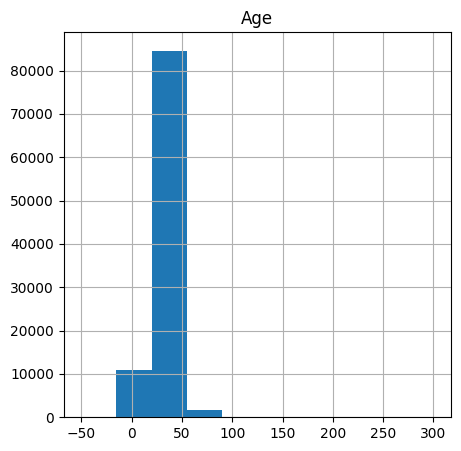

In [384]:
# cleanup Age, delete _ at the end, change data type to int
obj_to_numeric('Age', to_int=True)
print_col_info('Age');
df_main.hist(column=['Age'], figsize=(5, 5), range=[-50, 300])
plt.show()

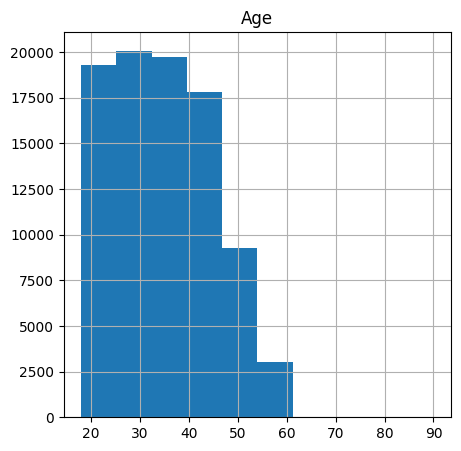

In [385]:
# from the histogram, we can see that majority of data are for 30-60 years
# delete rows with ages >= 90 and < 18

wrong_age = df_main[(df_main['Age'] >= 90) | (df_main['Age'] <= 18)].index
df_main.drop(wrong_age , inplace=True)

df_main.hist(column=['Age'], figsize=(5, 5), range=[18, 90])
plt.show()

#### Feature: Annual_Income

In [386]:
print_col_info('Annual_Income');

Annual_Income
object
['19114.12' '34847.84' '34847.84_' ... '20002.88' '39628.99' '39628.99_']
Annual_Income
36585.12              16
20867.67              16
95596.35              15
33029.66              15
17273.83              15
                      ..
11826.655_             1
48854.85000000001_     1
15148.68_              1
918988.0               1
40566.32_              1
Name: count, Length: 17346, dtype: int64
Number of rows: 89128
Number of rows with null value: 0


In [387]:
# Change Annual_Income to float, also clean up the data
obj_to_numeric('Annual_Income')

Dropping NA
Delete _ in the data
Changing data type to float
Number of null after the change: 0


Max: 24198062.000000, Min: 7006.035000


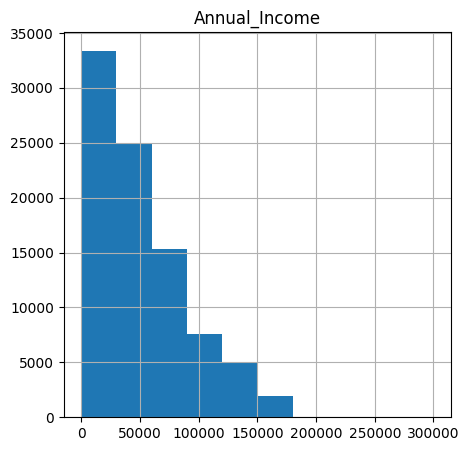

In [388]:
# Let's look at the distrubution of income
print("Max: %f, Min: %f" % (df_main['Annual_Income'].max(), df_main['Annual_Income'].min()))
df_main.hist(column=['Annual_Income'], figsize=(5, 5), range=[0, 300000])
plt.show()

Annual_Income
float64
[ 19114.12  34847.84 143162.64 ...  37188.1   20002.88  39628.99]
Annual_Income
32543.38     16
36585.12     16
109945.32    16
40341.16     16
20867.67     16
             ..
69428.72      1
40009.74      1
71936.88      1
62956.56      1
30638.28      1
Name: count, Length: 11553, dtype: int64
Number of rows: 88241
Number of rows with null value: 0


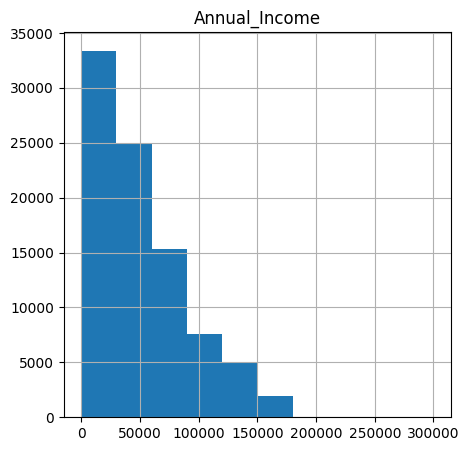

In [389]:
# Let's remove outliers
outlier_income = df_main[(df_main['Annual_Income'] >= 200000)].index
df_main.drop(outlier_income , inplace=True)

print_col_info('Annual_Income');
df_main.hist(column=['Annual_Income'], figsize=(5, 5), range=[0, 300000])
plt.show()

#### Feature: Occupation

In [390]:
print_col_info('Occupation')

Occupation
object
['Scientist' '_______' 'Teacher' 'Engineer' 'Entrepreneur' 'Developer'
 'Lawyer' 'Media_Manager' 'Doctor' 'Journalist' 'Manager' 'Accountant'
 'Musician' 'Mechanic' 'Writer' 'Architect']
Occupation
_______          6235
Lawyer           5846
Architect        5606
Mechanic         5562
Accountant       5560
Engineer         5550
Scientist        5535
Developer        5503
Media_Manager    5478
Entrepreneur     5428
Journalist       5423
Teacher          5381
Doctor           5342
Musician         5283
Manager          5279
Writer           5230
Name: count, dtype: int64
Number of rows: 88241
Number of rows with null value: 0


In [391]:
# fill missing occupation by the mode of the customer's occupation from other rows
df_main['Occupation'] = df_main['Occupation'].replace('_______',np.nan)
fill_na_by_customer('Occupation')
print_col_info('Occupation')

Occupation
object
['Scientist' 'Teacher' 'Engineer' 'Entrepreneur' 'Developer' 'Lawyer'
 'Media_Manager' 'Doctor' 'Journalist' 'Manager' 'Accountant' 'Musician'
 'Mechanic' 'Writer' 'Architect']
Occupation
Lawyer           6309
Architect        6032
Mechanic         5991
Engineer         5978
Accountant       5975
Scientist        5931
Developer        5929
Media_Manager    5908
Entrepreneur     5858
Journalist       5825
Teacher          5781
Doctor           5761
Manager          5687
Musician         5677
Writer           5599
Name: count, dtype: int64
Number of rows: 88241
Number of rows with null value: 0


#### Feature: Monthly_Inhand_Salary

In [392]:
print_col_info('Monthly_Inhand_Salary')

Monthly_Inhand_Salary
float64
[1824.84333333           nan 3037.98666667 ... 3097.00833333 1929.90666667
 3359.41583333]
Monthly_Inhand_Salary
2295.058333    15
6769.130000    15
6082.187500    15
3080.555000    14
6639.560000    13
               ..
2728.017745     1
2582.661667     1
2138.640000     1
5977.952490     1
3916.657500     1
Name: count, Length: 12213, dtype: int64
Number of rows: 88241
Number of rows with null value: 13235


In [393]:
# fill nan with the mode what the customer's salary is in other months 
# if such data doesn't exist drop the row
fill_na_by_customer('Monthly_Inhand_Salary')
print_col_info('Monthly_Inhand_Salary')

Monthly_Inhand_Salary
float64
[ 1824.84333333  3037.98666667 12187.22       ...  3097.00833333
  1929.90666667  3359.41583333]
Monthly_Inhand_Salary
2295.058333    16
1315.560833    16
5766.491667    16
3080.555000    16
6082.187500    16
               ..
7237.397300     1
440.040880      1
1692.554167     1
1316.334167     1
2671.207498     1
Name: count, Length: 12213, dtype: int64
Number of rows: 88237
Number of rows with null value: 0


#### Feature: Num_Bank_Accounts

In [394]:
print_col_info('Num_Bank_Accounts')

Num_Bank_Accounts
int64
[   3    2    1    7    4    0    8    5    6    9   10 1414   67  572
 1488   91  528 1696  649  889 1668  685  857  975 1496 1534 1620   37
 1388 1429 1332 1588  120 1777 1096  494 1139  831 1613  741  121  665
 1748 1644  823 1356 1651   87  450  210 1671 1722  648  672 1662 1495
  510  666  429 1131  980 1026  718 1300 1312 1315  501 1566  480 1042
 1016  333 1265  791  427  563 1190 1036 1611  619  555 1769  280 1201
  812 1487  222  212 1019 1222  610 1714 1308 1158 1115 1616  754 1601
  797 1577  521  703  933  959  809 1656 1113  964 1533 1789  871  434
 1295  565 1724  603  677  541  698 1101  464 1539 1011 1257 1727   45
 1266  897  535  484  675  826  946  105  845  549  473  710  527  908
   68 1628  371  445 1168  868  687  455 1003   26 1526  618  598 1342
 1783 1557 1335  416 1747  137 1475  942  170  973 1605 1478  386 1448
 1033 1225  596 1731 1214 1481 1105 1231  347  108  148 1001 1467 1114
 1000  632  246 1032 1394  482 1303  720  574  588  8

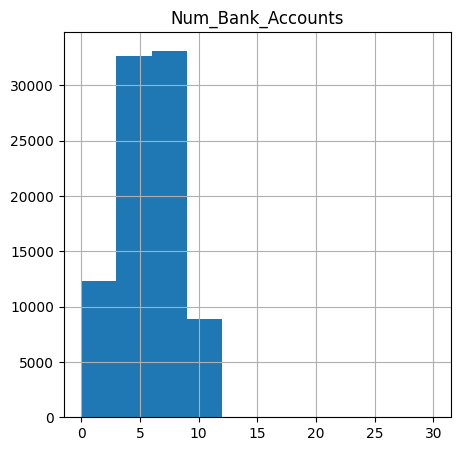

In [395]:
# print a histogram to examine the data visually
df_main.hist(column=['Num_Bank_Accounts'], figsize=(5, 5), range=[0, 30])
plt.show()

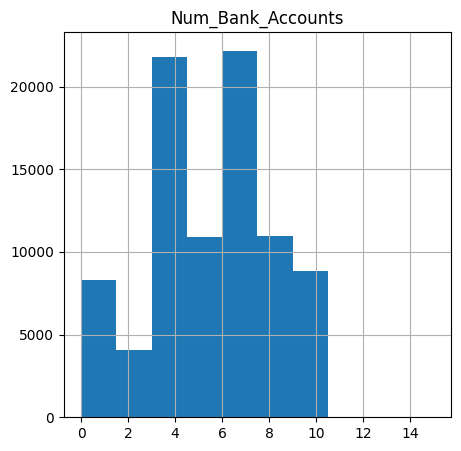

In [396]:
# change negative numbers to 0
# dropping rows with number of bank accounts > 15
df_main.loc[df_main['Num_Bank_Accounts'] < 0, 'Num_Bank_Accounts'] = 0

wrong_num_bank = df_main[(df_main['Num_Bank_Accounts'] > 15)].index
df_main.drop(wrong_num_bank , inplace=True)

df_main.hist(column=['Num_Bank_Accounts'], figsize=(5, 5), range=[0, 15])
plt.show()

#### Feature: Num_Credit_Card

In [397]:
print_col_info('Num_Credit_Card')

Num_Credit_Card
int64
[   4 1385    5 ...  955 1430  679]
Num_Credit_Card
5       16081
7       14474
6       14413
4       12517
3       11864
        ...  
1122        1
374         1
1148        1
825         1
679         1
Name: count, Length: 1108, dtype: int64
Number of rows: 87062
Number of rows with null value: 0


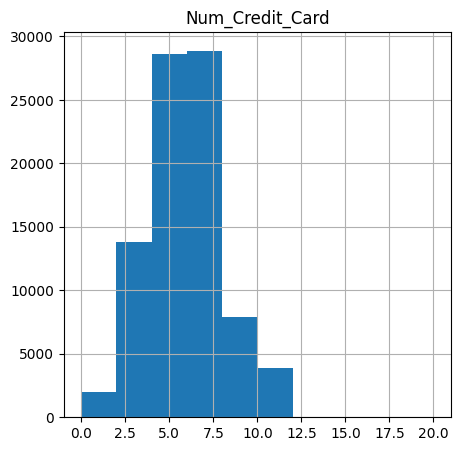

In [398]:
# histogram to show distribution
df_main.hist(column=['Num_Credit_Card'], figsize=(5, 5), range=[0, 20])
plt.show()

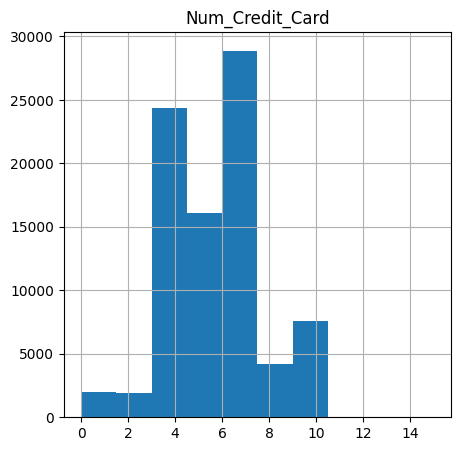

In [399]:
# change negative to 0
df_main.loc[df_main['Num_Credit_Card'] < 0, 'Num_Credit_Card'] = 0

# dropping rows with number of credit card > 15
wrong_credit_card = df_main[(df_main['Num_Credit_Card'] > 15)].index
df_main.drop(wrong_credit_card , inplace=True)

df_main.hist(column=['Num_Credit_Card'], figsize=(5, 5), range=[0, 15])
plt.show()

#### Feature: Interest_Rate

In [400]:
print_col_info('Interest_Rate')

Interest_Rate
int64
[   3    6    8 ... 1347 2536 5729]
Interest_Rate
5       4379
8       4374
6       4157
10      4044
12      4031
        ... 
4995       1
1899       1
4372       1
1683       1
5729       1
Name: count, Length: 1549, dtype: int64
Number of rows: 85087
Number of rows with null value: 0


#### Feature: Num_of_Loan

In [401]:
print_col_info('Num_of_Loan')

Num_of_Loan
object
['4' '1' '3' '967' '-100' '0' '0_' '2' '3_' '2_' '7' '5' '5_' '6' '8' '9'
 '9_' '4_' '7_' '1_' '8_' '1464' '6_' '622' '352' '1017' '945' '146' '563'
 '341' '720' '1485' '49' '737' '1106' '466' '728' '313' '119' '663' '640'
 '92_' '1019' '501' '1302' '39' '716' '848' '931' '186' '424' '1001'
 '1110' '1152' '457' '1433' '1187' '52' '1035' '1347_' '33' '193' '699'
 '329' '1451' '484' '649' '995' '545' '684' '1135' '1094' '1204' '654'
 '58' '348' '614' '323' '1406' '1348' '430' '153' '1461' '905' '1312'
 '1154' '95' '1353' '1228' '819' '1006' '795' '359' '1209' '590' '696'
 '1185_' '1465' '911' '70' '816' '1369' '143' '1416' '1096' '1474' '420'
 '904' '89' '527' '1241' '449' '418' '23' '238' '638' '138' '1480' '235_'
 '280' '1070' '1484' '274' '494' '1459_' '404' '1354' '1495' '1391' '601'
 '1313' '1319' '898' '231' '752' '174' '961' '1046' '834' '284' '288'
 '1463' '1151' '198' '1015' '855' '1444' '103' '1320_' '745' '172' '252'
 '630_' '241' '31' '405' '1217' '1257' '1

Dropping NA
Delete _ in the data
Changing data type to int
Number of null after the change: 0


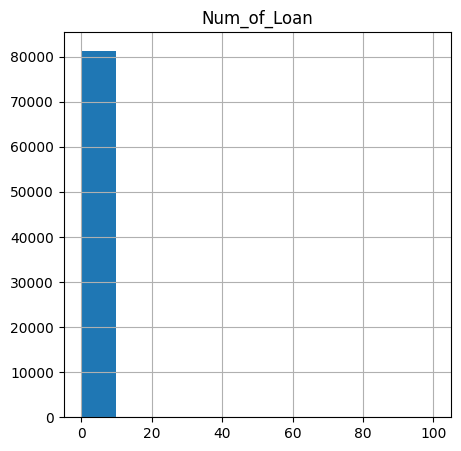

In [402]:
# cleanup Num_of_Loan, delete _ at the end, change data type to int
obj_to_numeric('Num_of_Loan', drop_na=True, to_int=True)
df_main.hist(column=['Num_of_Loan'], figsize=(5, 5), range=[0, 100])
plt.show()

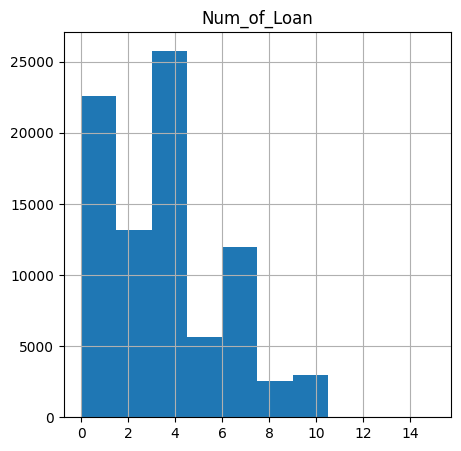

In [403]:
# changing <0 to 0
df_main.loc[df_main['Num_of_Loan'] < 0, 'Num_of_Loan'] = 0

# dropping rows with number of loan > 20
wrong_loan = df_main[(df_main['Num_of_Loan'] > 15)].index
df_main.drop(wrong_loan , inplace=True)

df_main.hist(column=['Num_of_Loan'], figsize=(5, 5), range=[0, 15])
plt.show()

#### Feature:Delay_from_due_date

In [404]:
# Delay_from_due_date
print_col_info('Delay_from_due_date')

Delay_from_due_date
int64
[ 3 -1  5  6  8  7 13 10  0  4  9  1 11 30 31 34 27 14  2 -2 16 17 15 23
 22 21 12 18 19 52 51 48 53 26 43 28 25 20 47 46 49 24 61 29 45 55 56 59
 62 65 64 54 67 57 41 39 44 42 33 35 36 38 -3 60 63 50 40 32 37 -5 58 -4
 66]
Delay_from_due_date
 15    3056
 13    2988
 8     2903
 14    2877
 10    2865
       ... 
 65      46
 64      44
-5       30
 66      25
 67      14
Name: count, Length: 73, dtype: int64
Number of rows: 84691
Number of rows with null value: 0


#### Feature: Num_of_Delayed_Payment

In [405]:
print_col_info('Num_of_Delayed_Payment')

Num_of_Delayed_Payment
object
['7' nan '4' '8_' '6' '1' '3_' '0' '8' '5' '3' '9' '12' '15' '17' '2' '14'
 '11' '20' '22' '10' '13' '13_' '14_' '16' '12_' '18' '19' '23' '24' '21'
 '3318' '3083' '22_' '1338' '26' '11_' '25' '10_' '183_' '-1' '19_' '24_'
 '17_' '23_' '2672' '20_' '4_' '2008' '538' '6_' '1_' '16_' '3478' '2420'
 '15_' '707' '708' '26_' '18_' '3815' '28' '27' '5_' '-2' '1867' '2250'
 '1463' '25_' '-3' '7_' '2882' '1941' '2655' '306' '9_' '0_' '3539' '3684'
 '1823' '4128' '1946' '827' '2297' '2566' '182' '929' '3568' '2503' '2812'
 '1697' '3764' '851' '3905' '923' '1668' '3253' '21_' '2689' '3858' '642'
 '3457' '3154' '847' '3037' '2204' '3103' '2_' '1063' '2056' '1841'
 '2569_' '211' '793' '3484' '411' '3491' '3050' '1049' '2162' '27_' '1718'
 '1014' '3855' '84' '3251' '1832' '4069' '3010' '733' '4241' '166' '2461'
 '1749' '3200' '663_' '2185' '4161' '3009' '359' '2015' '1523' '594'
 '1079' '1199' '186' '1015' '281' '559' '2165' '1509' '3545' '779' '4311'
 '-2_' '2323' '14

In [406]:
# Here's to figure out what to do with NaN
# First let's examine the data
show_customer_data_with_null_col('Num_of_Delayed_Payment')

       ID Customer_ID     Month           Name  Age          SSN Occupation  \
0  0x1602   CUS_0xd40   January  Aaron Maashoh   23  821-00-0265  Scientist   
1  0x1603   CUS_0xd40  February  Aaron Maashoh   23  821-00-0265  Scientist   
3  0x1605   CUS_0xd40     April  Aaron Maashoh   23  821-00-0265  Scientist   
4  0x1606   CUS_0xd40       May  Aaron Maashoh   23  821-00-0265  Scientist   
5  0x1607   CUS_0xd40      June  Aaron Maashoh   23  821-00-0265  Scientist   
6  0x1608   CUS_0xd40      July  Aaron Maashoh   23  821-00-0265  Scientist   
7  0x1609   CUS_0xd40    August            NaN   23    #F%$D@*&8  Scientist   

   Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  Num_Credit_Card  \
0       19114.12            1824.843333                  3                4   
1       19114.12            1824.843333                  3                4   
3       19114.12            1824.843333                  3                4   
4       19114.12            1824.843333            

From the data, we can see that customers Num_of_Delayed_Payment vary month to month and changing to NaN to the mode (marjority) of the entries can lead to incorrect data. We will drop these entries for now.

Dropping NA
Delete _ in the data
Changing data type to int
Number of null after the change: 0


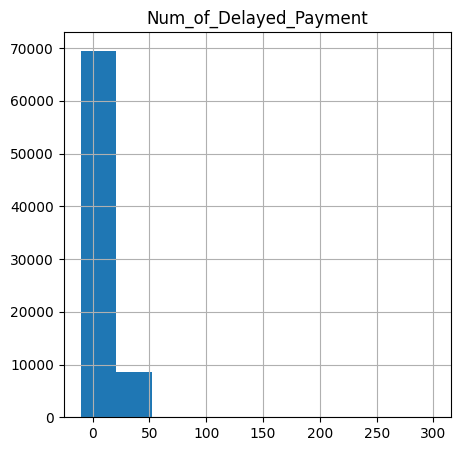

In [407]:
# cleanup Num_of_Delayed_Payment, delete _ at the end, change data type to int
# droppning NaN fields
obj_to_numeric('Num_of_Delayed_Payment', drop_na=True, to_int=True)
df_main.hist(column=['Num_of_Delayed_Payment'], figsize=(5, 5), range=[-10, 300])
plt.show()

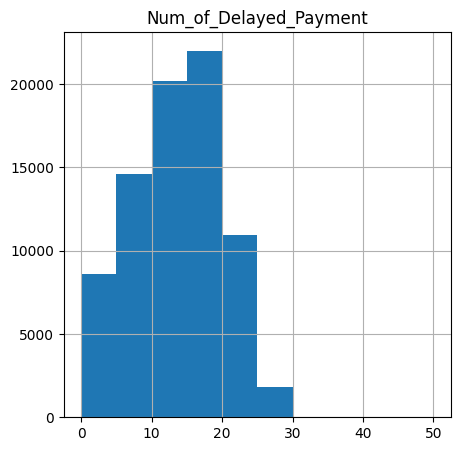

In [408]:
# change <0 to 0
df_main.loc[df_main['Num_of_Delayed_Payment'] < 0, 'Num_of_Delayed_Payment'] = 0

# dropping rows with delayed payment > 50 and < 0
wrong_delayed_pay = df_main[(df_main['Num_of_Delayed_Payment'] > 50) | (df_main['Num_of_Delayed_Payment'] < 0)].index
df_main.drop(wrong_delayed_pay, inplace=True)

df_main.hist(column=['Num_of_Delayed_Payment'], figsize=(5, 5), range=[0, 50])
plt.show()

#### Feature: Changed_Credit_Limit

In [409]:
print_col_info('Changed_Credit_Limit')

Changed_Credit_Limit
object
['11.27' '6.27' '9.27' ... '17.509999999999998' '25.16'
 '3.6199999999999988']
Changed_Credit_Limit
_                     1659
8.22                   113
10.06                  106
11.32                  106
11.5                   104
                      ... 
-1.06                    1
34.39                    1
15.510000000000002       1
36.97                    1
3.6199999999999988       1
Name: count, Length: 4225, dtype: int64
Number of rows: 78100
Number of rows with null value: 0


In [410]:
# Let's first examine rows with NaN value
show_customer_data_with_null_col('Changed_Credit_Limit')

In [411]:
# We will change NaN to mode
fill_na_by_customer('Changed_Credit_Limit')
print_col_info('Changed_Credit_Limit')

Changed_Credit_Limit
object
['11.27' '6.27' '9.27' ... '17.509999999999998' '25.16'
 '3.6199999999999988']
Changed_Credit_Limit
_                     1659
8.22                   113
10.06                  106
11.32                  106
11.5                   104
                      ... 
-1.06                    1
34.39                    1
15.510000000000002       1
36.97                    1
3.6199999999999988       1
Name: count, Length: 4225, dtype: int64
Number of rows: 78100
Number of rows with null value: 0


Dropping NA
Delete _ in the data
Changing data type to float
Number of null after the change: 1659
Max: 36.970000, Min: -6.480000


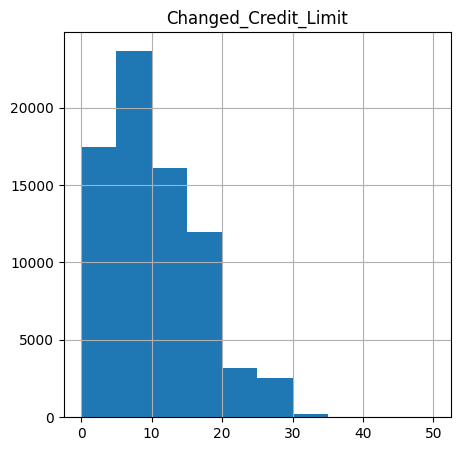

In [412]:
# cleanup Changed_Credit_Limit, delete _ at the end, change data type to float
obj_to_numeric('Changed_Credit_Limit')
print("Max: %f, Min: %f" % (df_main['Changed_Credit_Limit'].max(), df_main['Changed_Credit_Limit'].min()))
df_main.hist(column=['Changed_Credit_Limit'], figsize=(5, 5), range=[0, 50])
plt.show()

#### Feature: Num_Credit_Inquiries

Num_Credit_Inquiries
float64
[   4.    2.    3. ... 1361.   93.   74.]
Num_Credit_Inquiries
4.0       9223
3.0       7400
2.0       6728
1.0       6264
6.0       6061
          ... 
566.0        1
2231.0       1
748.0        1
1113.0       1
74.0         1
Name: count, Length: 1006, dtype: int64
Number of rows: 78100
Number of rows with null value: 1534


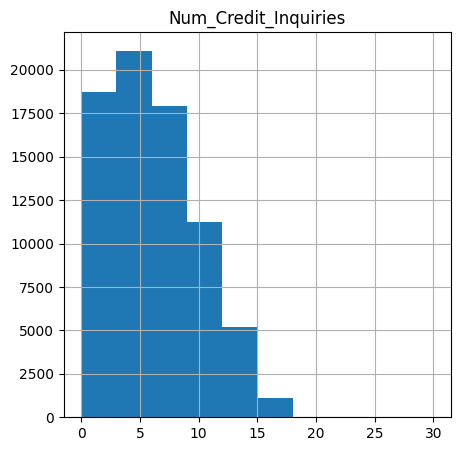

In [413]:
# Num_Credit_Inquiries
print_col_info('Num_Credit_Inquiries')
df_main.hist(column=['Num_Credit_Inquiries'], figsize=(5, 5), range=[0, 30])
plt.show()

In [414]:
# Let's take a look at NaN fields
show_customer_data_with_null_col('Num_Credit_Inquiries')

        ID Customer_ID     Month    Name  Age          SSN Occupation  \
16  0x161a  CUS_0x2dbc   January  Langep   34  486-85-3974   Engineer   
17  0x161b  CUS_0x2dbc  February     NaN   34  486-85-3974   Engineer   
18  0x161c  CUS_0x2dbc     March  Langep   34  486-85-3974   Engineer   
19  0x161d  CUS_0x2dbc     April  Langep   34  486-85-3974   Engineer   
20  0x161e  CUS_0x2dbc       May  Langep   34  486-85-3974   Engineer   
22  0x1620  CUS_0x2dbc      July     NaN   34  486-85-3974   Engineer   
23  0x1621  CUS_0x2dbc    August  Langep   34  486-85-3974   Engineer   

    Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  Num_Credit_Card  \
16      143162.64               12187.22                  1                5   
17      143162.64               12187.22                  1                5   
18      143162.64               12187.22                  1                5   
19      143162.64               12187.22                  1                5   
20      143162.

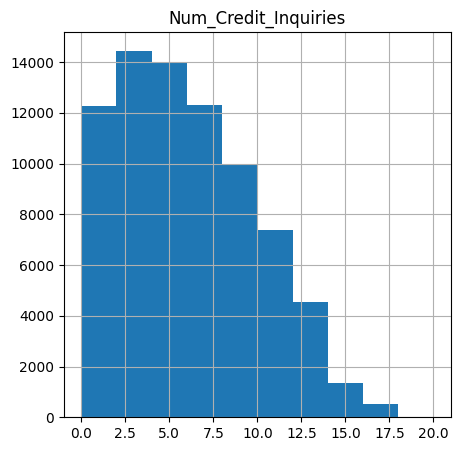

In [415]:
# From the data, it's safe to fill NaN with the mode/most frequent entries of this customer
fill_na_by_customer('Num_Credit_Inquiries')

# change <0 to 0
df_main.loc[df_main['Num_Credit_Inquiries'] < 0, 'Num_Credit_Inquiries'] = 0

# delete Num_Credit_Inquiries > 20
wrong_credit_inq = df_main[(df_main['Num_Credit_Inquiries'] > 20)].index
df_main.drop(wrong_credit_inq, inplace=True)

df_main.hist(column=['Num_Credit_Inquiries'], figsize=(5, 5), range=[0, 20])
plt.show()

In [416]:
print_col_info('Num_Credit_Inquiries')

Num_Credit_Inquiries
float64
[ 4.  2.  3.  5.  9.  8.  7.  6.  0.  1. 10. 11. 12. 17. 13. 14. 16. 15.]
Num_Credit_Inquiries
4.0     9444
3.0     7565
2.0     6890
1.0     6381
6.0     6168
7.0     6145
8.0     5911
0.0     5875
5.0     4570
9.0     4038
11.0    3724
10.0    3678
12.0    3466
13.0    1092
14.0     752
15.0     590
16.0     318
17.0     211
Name: count, dtype: int64
Number of rows: 76818
Number of rows with null value: 0


#### Feature: Credit_Mix

In [417]:
print_col_info('Credit_Mix')

Credit_Mix
object
['_' 'Good' 'Standard' 'Bad']
Credit_Mix
Standard    27691
Good        19958
_           15633
Bad         13536
Name: count, dtype: int64
Number of rows: 76818
Number of rows with null value: 0


In [418]:
# first replacing _ with Nan
# then we will examine the NaN rows
df_main['Credit_Mix'] = df_main['Credit_Mix'].replace('_',np.nan)
show_customer_data_with_null_col('Credit_Mix')

       ID Customer_ID    Month           Name  Age          SSN Occupation  \
0  0x1602   CUS_0xd40  January  Aaron Maashoh   23  821-00-0265  Scientist   
3  0x1605   CUS_0xd40    April  Aaron Maashoh   23  821-00-0265  Scientist   
5  0x1607   CUS_0xd40     June  Aaron Maashoh   23  821-00-0265  Scientist   
6  0x1608   CUS_0xd40     July  Aaron Maashoh   23  821-00-0265  Scientist   
7  0x1609   CUS_0xd40   August            NaN   23    #F%$D@*&8  Scientist   

   Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  Num_Credit_Card  \
0       19114.12            1824.843333                  3                4   
3       19114.12            1824.843333                  3                4   
5       19114.12            1824.843333                  3                4   
6       19114.12            1824.843333                  3                4   
7       19114.12            1824.843333                  3                4   

   Interest_Rate  Num_of_Loan  \
0              3       

In [419]:
# Customer's Credit_Mix doesn't change from row to row (month to month), safe to replace NaN with mode
fill_na_by_customer('Credit_Mix')
print_col_info('Credit_Mix')

Credit_Mix
object
['Good' 'Standard' 'Bad']
Credit_Mix
Standard    34892
Good        24944
Bad         16975
Name: count, dtype: int64
Number of rows: 76811
Number of rows with null value: 0


**We will be converting 'Credit_Mix' into numerical as it is categority data, we will do it later with all the other categorical features**

#### Feature: Outstanding_Debt

In [420]:
print_col_info('Outstanding_Debt')

Outstanding_Debt
object
['809.98' '605.03' '1303.01' ... '3571.7_' '3571.7' '502.38']
Outstanding_Debt
1151.7      21
1360.45     20
1109.03     20
460.46      19
953.75      16
            ..
2193.11_     1
1136.85_     1
830.07_      1
2268.36_     1
4921.57_     1
Name: count, Length: 12049, dtype: int64
Number of rows: 76811
Number of rows with null value: 0


In [421]:
# changing Outstanding_Debt to float
obj_to_numeric('Outstanding_Debt', drop_na=False)

Delete _ in the data
Changing data type to float
Number of null after the change: 0


#### Feature: Credit_Utilization_Ratio

In [422]:
print_col_info('Credit_Utilization_Ratio')

Credit_Utilization_Ratio
float64
[26.82261962 31.37786187 27.26225871 ... 40.56563096 41.25552226
 34.19246265]
Credit_Utilization_Ratio
26.822620    1
33.102195    1
36.682846    1
30.269493    1
36.877641    1
            ..
29.074363    1
33.462681    1
27.548474    1
32.903660    1
34.192463    1
Name: count, Length: 76811, dtype: int64
Number of rows: 76811
Number of rows with null value: 0


In [423]:
# changing <0 to 0
df_main.loc[df_main['Credit_Utilization_Ratio'] < 0, 'Credit_Utilization_Ratio'] = 0

#### Feature: Credit_History_Age

In [424]:
print_col_info('Credit_History_Age')

Credit_History_Age
object
['22 Years and 1 Months' '22 Years and 4 Months' '22 Years and 6 Months'
 '22 Years and 7 Months' nan '26 Years and 7 Months'
 '26 Years and 8 Months' '26 Years and 10 Months' '26 Years and 11 Months'
 '27 Years and 0 Months' '27 Years and 1 Months' '27 Years and 2 Months'
 '17 Years and 9 Months' '17 Years and 10 Months' '17 Years and 11 Months'
 '18 Years and 1 Months' '18 Years and 3 Months' '18 Years and 4 Months'
 '17 Years and 3 Months' '17 Years and 4 Months' '17 Years and 5 Months'
 '17 Years and 6 Months' '17 Years and 7 Months' '17 Years and 8 Months'
 '30 Years and 10 Months' '30 Years and 11 Months' '31 Years and 0 Months'
 '31 Years and 1 Months' '31 Years and 2 Months' '31 Years and 3 Months'
 '32 Years and 0 Months' '32 Years and 2 Months' '32 Years and 3 Months'
 '32 Years and 5 Months' '32 Years and 6 Months' '30 Years and 7 Months'
 '30 Years and 8 Months' '30 Years and 9 Months' '14 Years and 8 Months'
 '14 Years and 9 Months' '14 Years and 

In [425]:
# First we will examine NaN data
show_customer_data_with_null_col('Credit_History_Age')

       ID Customer_ID    Month           Name  Age          SSN Occupation  \
0  0x1602   CUS_0xd40  January  Aaron Maashoh   23  821-00-0265  Scientist   
3  0x1605   CUS_0xd40    April  Aaron Maashoh   23  821-00-0265  Scientist   
5  0x1607   CUS_0xd40     June  Aaron Maashoh   23  821-00-0265  Scientist   
6  0x1608   CUS_0xd40     July  Aaron Maashoh   23  821-00-0265  Scientist   
7  0x1609   CUS_0xd40   August            NaN   23    #F%$D@*&8  Scientist   

   Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  Num_Credit_Card  \
0       19114.12            1824.843333                  3                4   
3       19114.12            1824.843333                  3                4   
5       19114.12            1824.843333                  3                4   
6       19114.12            1824.843333                  3                4   
7       19114.12            1824.843333                  3                4   

   Interest_Rate  Num_of_Loan  \
0              3       

In [426]:
# From the data, it's safe to change it to the customer's mode/majority
fill_na_by_customer('Credit_History_Age')

In [427]:
# changing Credit_History_Age into float

def date_to_num_str(date_str):
    # convert '# Years and # Months' in to # years
    # returns a string
    date_str_split = date_str.split()
    y = int(date_str_split[0])
    m = int(date_str_split[date_str_split.index('and') + 1])
    return str(round(y + m/12, 2))

df_main['Credit_History_Age'] = df_main['Credit_History_Age'].apply(lambda x: date_to_num_str(x))
obj_to_numeric('Credit_History_Age')

Dropping NA
Delete _ in the data
Changing data type to float
Number of null after the change: 0


Credit_History_Age
float64
[22.08 22.33 22.5  22.58 26.58 26.67 26.83 26.92 27.   27.08 27.17 17.75
 17.83 17.92 18.08 18.25 18.33 17.25 17.33 17.42 17.5  17.58 17.67 30.83
 30.92 31.   31.08 31.17 31.25 32.   32.17 32.25 32.42 32.5  30.58 30.67
 30.75 14.67 14.75 14.83 14.92 15.   15.08 15.17 21.33 21.42 21.5  21.58
 21.67 21.75 21.92 26.5  26.75 19.17 19.25 19.33 19.42 19.5  19.58 19.67
 25.42 25.5  25.58 25.67 25.75 25.83 25.92 27.25 27.33 27.42  8.92  9.
  9.17  9.25  9.33  9.5  18.17 18.42 18.5  18.67 18.75 16.83 16.92 17.08
 17.17 29.17 29.25 29.33 29.5  29.67 29.75  6.42  6.5   6.58  6.67  6.83
  7.   27.58 27.67 27.75 19.75 19.83 10.17 10.25 10.33 10.58 10.67 32.75
 32.83 32.92 33.   33.08 33.33 12.25 12.33 12.42 12.5  12.58 12.67 12.83
 12.75 13.67 13.92 14.   14.08 14.17 30.25 30.33 30.42 30.5   8.75  9.08
 18.58 18.83 18.92 19.    8.67  8.83 13.08 13.17 13.25 13.42 13.58 21.83
 22.   26.   26.08 26.17 27.92 28.   28.08 28.17 28.25 28.42 28.5   7.92
  8.    8.08  8.17  8.25  

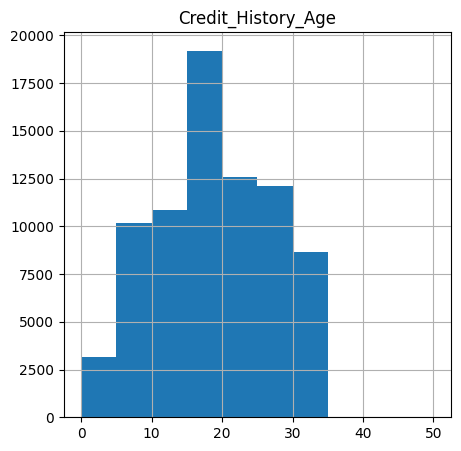

In [428]:
print_col_info('Credit_History_Age')
print("Max: %f, Min: %f" % (df_main['Credit_History_Age'].max(), df_main['Credit_History_Age'].min()))
df_main.hist(column=['Credit_History_Age'], figsize=(5, 5), range=[0, 50])
plt.show()

#### Feature: Payment_of_Min_Amount

In [429]:
print_col_info('Payment_of_Min_Amount')

Payment_of_Min_Amount
object
['No' 'NM' 'Yes']
Payment_of_Min_Amount
Yes    38320
No     29288
NM      9203
Name: count, dtype: int64
Number of rows: 76811
Number of rows with null value: 0


In [430]:
# First, let's change NM to NaN and check how this value looks
df_main['Payment_of_Min_Amount'] = df_main['Payment_of_Min_Amount'].replace('NM',np.nan)
show_customer_data_with_null_col('Payment_of_Min_Amount')

        ID Customer_ID     Month             Name  Age          SSN  \
8   0x160e  CUS_0x21b1   January  Rick Rothackerj   28  004-07-5839   
9   0x160f  CUS_0x21b1  February  Rick Rothackerj   28  004-07-5839   
11  0x1611  CUS_0x21b1     April  Rick Rothackerj   28  004-07-5839   
12  0x1612  CUS_0x21b1       May  Rick Rothackerj   28  004-07-5839   
13  0x1613  CUS_0x21b1      June  Rick Rothackerj   28  004-07-5839   
14  0x1614  CUS_0x21b1      July  Rick Rothackerj   28  004-07-5839   
15  0x1615  CUS_0x21b1    August  Rick Rothackerj   28  004-07-5839   

   Occupation  Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  \
8     Teacher       34847.84            3037.986667                  2   
9     Teacher       34847.84            3037.986667                  2   
11    Teacher       34847.84            3037.986667                  2   
12    Teacher       34847.84            3037.986667                  2   
13    Teacher       34847.84            3037.986667          

In [431]:
# Good to change into mode
fill_na_by_customer('Payment_of_Min_Amount')
print_col_info('Payment_of_Min_Amount')

Payment_of_Min_Amount
object
['No' 'Yes']
Payment_of_Min_Amount
Yes    43496
No     33312
Name: count, dtype: int64
Number of rows: 76808
Number of rows with null value: 0


**We will convert this categorical data to numerical type later**

#### Feature: Type_of_Loan

In [432]:
print_col_info('Type_of_Loan')

Type_of_Loan
object
['Auto Loan, Credit-Builder Loan, Personal Loan, and Home Equity Loan'
 'Credit-Builder Loan' 'Auto Loan, Auto Loan, and Not Specified' ...
 'Home Equity Loan, Auto Loan, Auto Loan, and Auto Loan'
 'Payday Loan, Student Loan, Mortgage Loan, and Not Specified'
 'Personal Loan, Auto Loan, Mortgage Loan, Student Loan, and Student Loan']
Type_of_Loan
Not Specified                                                                                                                        1151
Personal Loan                                                                                                                        1036
Student Loan                                                                                                                         1035
Credit-Builder Loan                                                                                                                  1025
Debt Consolidation Loan                                                        

In [433]:
# Get the top 10 most frequenst
df_main['Type_of_Loan'].value_counts()[:10].index.tolist()

['Not Specified',
 'Personal Loan',
 'Student Loan',
 'Credit-Builder Loan',
 'Debt Consolidation Loan',
 'Mortgage Loan',
 'Auto Loan',
 'Payday Loan',
 'Home Equity Loan',
 'Personal Loan, and Student Loan']

In [434]:
# We will create 8 columns for the most frequent and delete type_of_loan
list_of_loans = [
 'Personal Loan',
 'Student Loan',
 'Credit-Builder Loan',
 'Debt Consolidation Loan',
 'Mortgage Loan',
 'Auto Loan',
 'Payday Loan',
 'Home Equity Loan'
]

for loan in list_of_loans:
    df_main[loan] = df_main['Type_of_Loan'].str.contains(loan).map({False: 0, True: 1})

df_main.drop('Type_of_Loan', axis = 1, inplace = True)
df_main.info()

<class 'pandas.core.frame.DataFrame'>
Index: 76808 entries, 0 to 99999
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        76808 non-null  object 
 1   Customer_ID               76808 non-null  object 
 2   Month                     76808 non-null  object 
 3   Name                      69096 non-null  object 
 4   Age                       76808 non-null  Int64  
 5   SSN                       76808 non-null  object 
 6   Occupation                76808 non-null  object 
 7   Annual_Income             76808 non-null  float64
 8   Monthly_Inhand_Salary     76808 non-null  float64
 9   Num_Bank_Accounts         76808 non-null  int64  
 10  Num_Credit_Card           76808 non-null  int64  
 11  Interest_Rate             76808 non-null  int64  
 12  Num_of_Loan               76808 non-null  Int64  
 13  Delay_from_due_date       76808 non-null  int64  
 14  Num_of_Dela

#### Feature: Total_EMI_per_month

In [435]:
print_col_info('Total_EMI_per_month')

Total_EMI_per_month
float64
[   49.57494921    18.81621457   246.99231945 ...    60.96477237
 12112.            35.10402261]
Total_EMI_per_month
0.000000        8590
62.599918          8
71.668822          8
133.843813         8
72.752775          8
                ... 
3324.000000        1
21660.000000       1
13798.000000       1
42123.000000       1
8088.000000        1
Name: count, Length: 13248, dtype: int64
Number of rows: 76808
Number of rows with null value: 0


In [436]:
# changing <0 to -
df_main.loc[df_main['Total_EMI_per_month'] < 0, 'Total_EMI_per_month'] = 0

Max: 82331.000000, Min: 0.000000


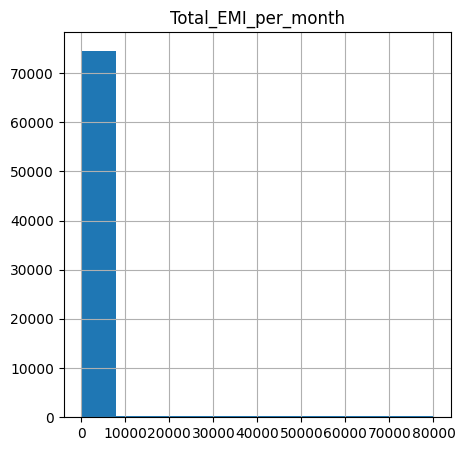

In [437]:
# Let's look at the distrubution of total_emi
print("Max: %f, Min: %f" % (df_main['Total_EMI_per_month'].max(), df_main['Total_EMI_per_month'].min()))
df_main.hist(column=['Total_EMI_per_month'], figsize=(5, 5), range=[0, 80000])
plt.show()

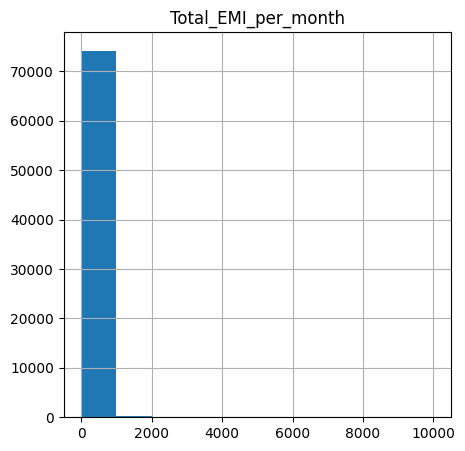

In [438]:
# We will remove outliers, all that's above 10000
wrong_emi = df_main[(df_main['Total_EMI_per_month'] > 10000)].index
df_main.drop(wrong_emi, inplace=True)

df_main.hist(column=['Total_EMI_per_month'], figsize=(5, 5), range=[0, 10000])
plt.show()

#### Feature: Amount_invested_monthly

In [439]:
print_col_info('Amount_invested_monthly')

Amount_invested_monthly
object
['80.41529543900253' '199.4580743910713' '62.430172331195294' ...
 '54.18595028760385' '24.02847744864441' '167.1638651610451']
Amount_invested_monthly
__10000__             3231
0.0                    113
39.48486172045045        1
16.017738880371418       1
13.965640268204758       1
                      ... 
80.80833460925956        1
148.38802218968212       1
224.1407425722944        1
647.1877041597468        1
167.1638651610451        1
Name: count, Length: 67928, dtype: int64
Number of rows: 74632
Number of rows with null value: 3362


In [440]:
# again we want to see what to do with NaN
show_customer_data_with_null_col('Amount_invested_monthly')

        ID Customer_ID     Month  Name  Age          SSN     Occupation  \
57  0x1657  CUS_0x5407  February  Annk   30  500-92-6408  Media_Manager   
58  0x1658  CUS_0x5407     March  Annk   30  500-92-6408  Media_Manager   
59  0x1659  CUS_0x5407     April  Annk   30  500-92-6408  Media_Manager   
60  0x165a  CUS_0x5407       May  Annk   30  500-92-6408  Media_Manager   
61  0x165b  CUS_0x5407      June  Annk   30  500-92-6408  Media_Manager   
62  0x165c  CUS_0x5407      July  Annk   30  500-92-6408  Media_Manager   
63  0x165d  CUS_0x5407    August  Annk   30  500-92-6408  Media_Manager   

    Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  Num_Credit_Card  \
57       34081.38               2611.115                  8                7   
58       34081.38               2611.115                  8                7   
59       34081.38               2611.115                  8                7   
60       34081.38               2611.115                  8                7   

From the data, Amount_invested_monthly for customer verys quite a bit per month

an example:

Amount_invested_monthly
38.4369827577036   
199.7207654954979   
220.55219192916718   
NaN   
NaN   
55.45978063925893   
29.32636371091455

Changing NaN to mode is not a good idea. We will change to mean/average instead

In [441]:
# First Need to clean up data with underscore and convert column to float
obj_to_numeric('Amount_invested_monthly', drop_na=False)

# Change <0 to 0
df_main.loc[df_main['Amount_invested_monthly'] < 0, 'Amount_invested_monthly'] = 0

# Change NaN to the customer's mean
fill_na_by_customer_mean('Amount_invested_monthly')

print_col_info('Amount_invested_monthly')

Delete _ in the data
Changing data type to float
Number of null after the change: 3362
Amount_invested_monthly
float64
[ 80.41529544 199.45807439  62.43017233 ...  54.18595029  24.02847745
 167.16386516]
Amount_invested_monthly
10000.000000    3231
0.000000         113
264.912600         3
94.570461          3
68.029799          3
                ... 
93.938692          1
193.211921         1
105.971928         1
256.110738         1
167.163865         1
Name: count, Length: 71026, dtype: int64
Number of rows: 74632
Number of rows with null value: 0


Max: 10000.000000, Min: 0.000000


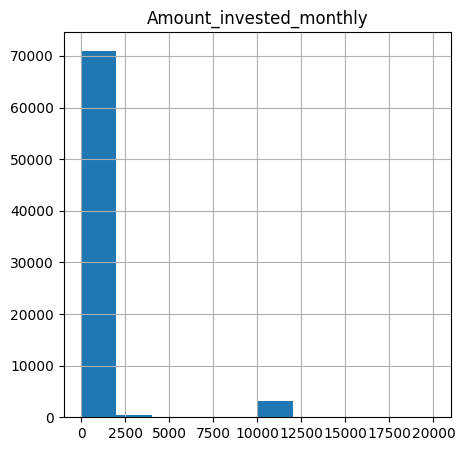

In [442]:
# Let's look at the distrubution of amount invested monthly
print("Max: %f, Min: %f" % (df_main['Amount_invested_monthly'].max(), df_main['Amount_invested_monthly'].min()))
df_main.hist(column=['Amount_invested_monthly'], figsize=(5, 5), range=[0, 20000])
plt.show()

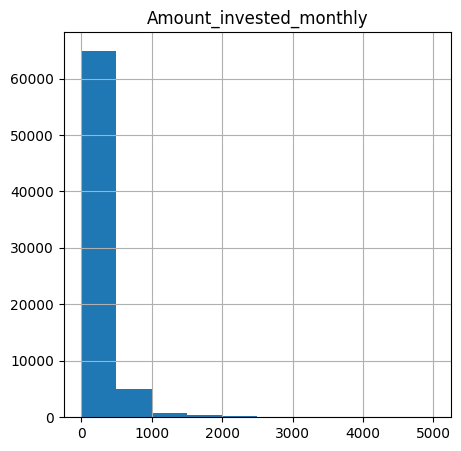

In [443]:
# Removing outliers amount invested > 5000
wrong_invest = df_main[(df_main['Amount_invested_monthly'] > 5000)].index
df_main.drop(wrong_invest, inplace=True)

df_main.hist(column=['Amount_invested_monthly'], figsize=(5, 5), range=[0, 5000])
plt.show()

#### Feature: Payment_Behaviour

In [444]:
print_col_info('Payment_Behaviour')

Payment_Behaviour
object
['High_spent_Small_value_payments' 'Low_spent_Small_value_payments'
 '!@9#%8' 'High_spent_Medium_value_payments'
 'High_spent_Large_value_payments' 'Low_spent_Medium_value_payments'
 'Low_spent_Large_value_payments']
Payment_Behaviour
Low_spent_Small_value_payments      17988
High_spent_Medium_value_payments    12641
Low_spent_Medium_value_payments      9923
High_spent_Large_value_payments      9919
High_spent_Small_value_payments      8115
Low_spent_Large_value_payments       7436
!@9#%8                               5367
Name: count, dtype: int64
Number of rows: 71389
Number of rows with null value: 0


In [445]:
# We need to check what !@9#%8 looks like
df_main['Payment_Behaviour'] = df_main['Payment_Behaviour'].replace('!@9#%8',np.nan)
show_customer_data_with_null_col('Payment_Behaviour')

       ID Customer_ID    Month           Name  Age          SSN Occupation  \
0  0x1602   CUS_0xd40  January  Aaron Maashoh   23  821-00-0265  Scientist   
3  0x1605   CUS_0xd40    April  Aaron Maashoh   23  821-00-0265  Scientist   
5  0x1607   CUS_0xd40     June  Aaron Maashoh   23  821-00-0265  Scientist   
6  0x1608   CUS_0xd40     July  Aaron Maashoh   23  821-00-0265  Scientist   
7  0x1609   CUS_0xd40   August            NaN   23    #F%$D@*&8  Scientist   

   Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  Num_Credit_Card  \
0       19114.12            1824.843333                  3                4   
3       19114.12            1824.843333                  3                4   
5       19114.12            1824.843333                  3                4   
6       19114.12            1824.843333                  3                4   
7       19114.12            1824.843333                  3                4   

   Interest_Rate  Num_of_Loan  Delay_from_due_date  Num_

In [446]:
# We will replace NaN with the mode
fill_na_by_customer('Payment_Behaviour')
print_col_info('Payment_Behaviour');

# we will look into this categorical data later

Payment_Behaviour
object
['High_spent_Small_value_payments' 'Low_spent_Small_value_payments'
 'High_spent_Medium_value_payments' 'High_spent_Large_value_payments'
 'Low_spent_Medium_value_payments' 'Low_spent_Large_value_payments']
Payment_Behaviour
Low_spent_Small_value_payments      19420
High_spent_Medium_value_payments    13949
High_spent_Large_value_payments     11157
Low_spent_Medium_value_payments     10455
High_spent_Small_value_payments      8599
Low_spent_Large_value_payments       7805
Name: count, dtype: int64
Number of rows: 71385
Number of rows with null value: 0


#### Feature: Monthly_Balance

In [447]:
print_col_info('Monthly_Balance')

Monthly_Balance
object
['312.49408867943663' '223.45130972736786' '340.4792117872438' ...
 496.651610435322 516.8090832742814 393.6736955618808]
Monthly_Balance
__-333333333333333333333333333__    7
312.49408867943663                  1
280.4921271558287                   1
324.61691028427504                  1
355.7197278444576                   1
                                   ..
374.6166544349885                   1
258.1340240245024                   1
252.7278002957164                   1
258.6438359546298                   1
393.673696                          1
Name: count, Length: 70543, dtype: int64
Number of rows: 71385
Number of rows with null value: 836


In [448]:
# First, let's examine the NaN rows
show_customer_data_with_null_col('Monthly_Balance')

         ID Customer_ID    Month   Name  Age          SSN Occupation  \
192  0x1722  CUS_0xa5f9  January  Rickt   34  189-09-5267   Mechanic   
195  0x1725  CUS_0xa5f9    April  Rickt   34  189-09-5267   Mechanic   
196  0x1726  CUS_0xa5f9      May  Rickt   34    #F%$D@*&8   Mechanic   
197  0x1727  CUS_0xa5f9     June  Rickt   34  189-09-5267   Mechanic   
199  0x1729  CUS_0xa5f9   August  Rickt   34    #F%$D@*&8   Mechanic   

     Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  Num_Credit_Card  \
192       57983.12            4720.926667                  9                8   
195       57983.12            4720.926667                  9                8   
196       57983.12            4720.926667                  9                8   
197       57983.12            4720.926667                  9                8   
199       57983.12            4720.926667                  9                8   

     Interest_Rate  Num_of_Loan  Delay_from_due_date  Num_of_Delayed_Payment  \


In [449]:
# Average/Mean varies from month to month, mode is not a good idea
# good to change NaN to Average/Mean
obj_to_numeric('Monthly_Balance', drop_na=False)

# Change NaN to the customer's mean
fill_na_by_customer_mean('Monthly_Balance')

print_col_info('Monthly_Balance')

Delete _ in the data
Changing data type to float
Number of null after the change: 836
Monthly_Balance
float64
[312.49408868 223.45130973 340.47921179 ... 496.65161044 516.80908327
 393.67369556]
Monthly_Balance
-3.333333e+26    7
 6.870893e+01    5
 1.953175e+02    4
 5.905922e+02    4
 2.724147e+02    3
                ..
 3.019588e+02    1
 3.488681e+02    1
 5.124999e+02    1
 6.704842e+02    1
 3.936737e+02    1
Name: count, Length: 71291, dtype: int64
Number of rows: 71384
Number of rows with null value: 0


Max: 1576.288935, Min: -333333333333333314856026112.000000


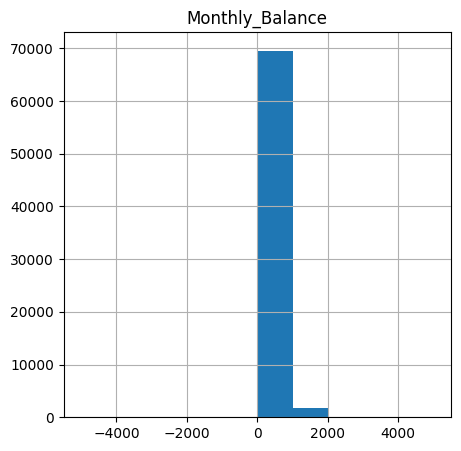

In [450]:
# Let's look at the distrubution of balance
print("Max: %f, Min: %f" % (df_main['Monthly_Balance'].max(), df_main['Monthly_Balance'].min()))
df_main.hist(column=['Monthly_Balance'], figsize=(5, 5), range=[-5000, 5000])
plt.show()

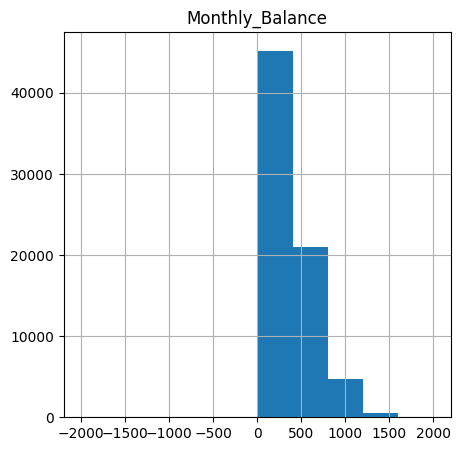

In [451]:
# Clearly -333333333333333314856026112.000000 is not a good number
# We will remove rows with Monthly Balance < -2000
wrong_balance = df_main[(df_main['Monthly_Balance'] < -2000)].index
df_main.drop(wrong_balance, inplace=True)

df_main.hist(column=['Monthly_Balance'], figsize=(5, 5), range=[-2000, 2000])
plt.show()


#### Feature: Credit_Score (Prediction y)

In [452]:
print_col_info('Credit_Score')

Credit_Score
object
['Good' 'Standard' 'Poor']
Credit_Score
Standard    38024
Poor        19951
Good        13402
Name: count, dtype: int64
Number of rows: 71377
Number of rows with null value: 0


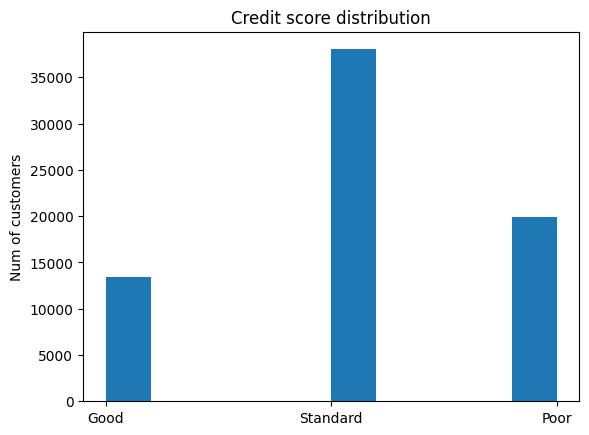

In [453]:
plt.hist(df_main['Credit_Score'])
plt.title('Credit score distribution')
plt.ylabel('Num of customers')
plt.show()

## Exploratory Data Analysis

### Numerical Data Analysis

In [454]:
df_numeric = df_main.select_dtypes(include = ['float','int'])
df_numeric.columns

Index(['Age', 'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Outstanding_Debt', 'Credit_Utilization_Ratio',
       'Credit_History_Age', 'Total_EMI_per_month', 'Amount_invested_monthly',
       'Monthly_Balance', 'Personal Loan', 'Student Loan',
       'Credit-Builder Loan', 'Debt Consolidation Loan', 'Mortgage Loan',
       'Auto Loan', 'Payday Loan', 'Home Equity Loan'],
      dtype='object')

**We will examine the correlation between numerical variables through heatmap**

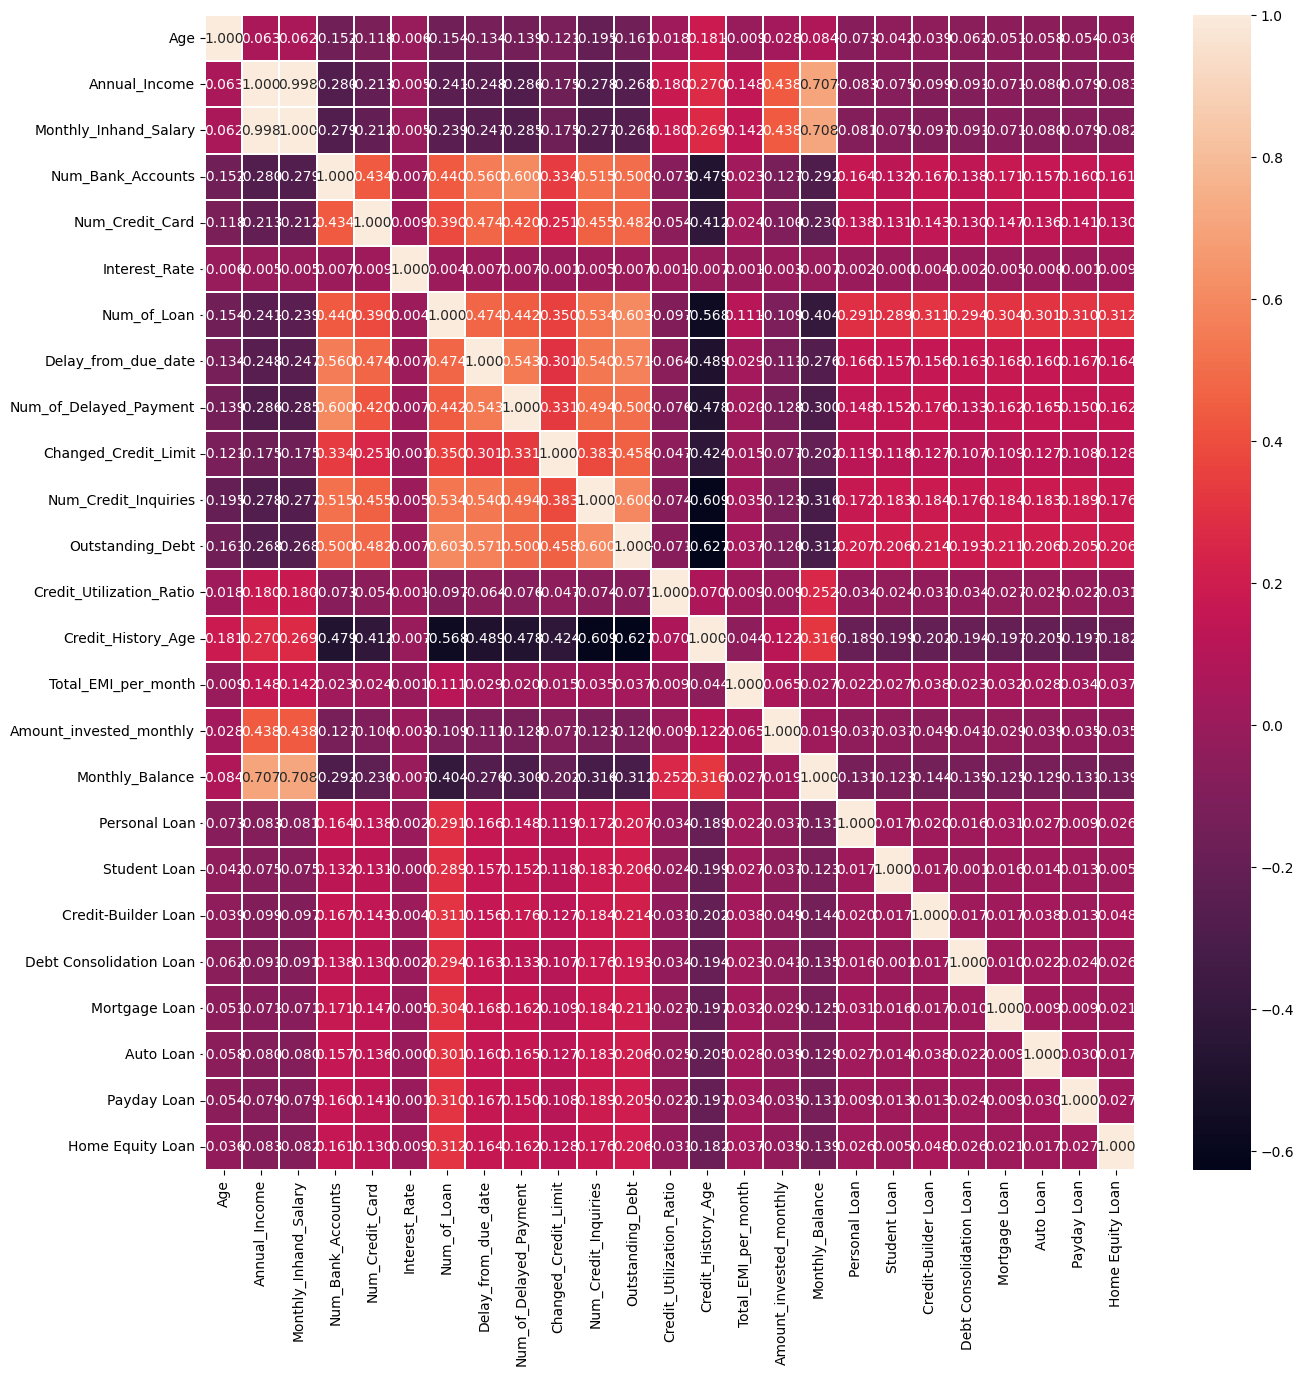

In [455]:
fig, ax = plt.subplots(figsize=(15,15))
sns.heatmap(df_numeric.corr(), annot=True, fmt=".3f", linewidth=.1, ax=ax);

### Observations:
The strongest correlation (>= 0.6) are between 
1. Annual Income & Monthly_Inhand_Salary (Very high correlation, 0.9)
2. Annual Income & Monthly_Balance (0.7)
3. Monthly_Inhand_Salary & Monthly_Balance (0.7)
4. (These three features are strong correlated)
5. Num_of_Loan & Outstanding_Debt
6. Num_Bank_Accounts & Num_of_Delayed_Payment
7. Num_Credit_Inquiries & Outstanding_Debt

These fields in general have fairly close correlation (the light yellow square in the heatmap)

1. Num_Bank_Accounts
2. Num_Credit_Card
3. Num_of_Loan
4. Delay_from_due_date
5. Num_of_Delayed_Payment
6. Num_Credit_Inquiries
7. Outstanding_Debt

Let's look at the pair plots between them

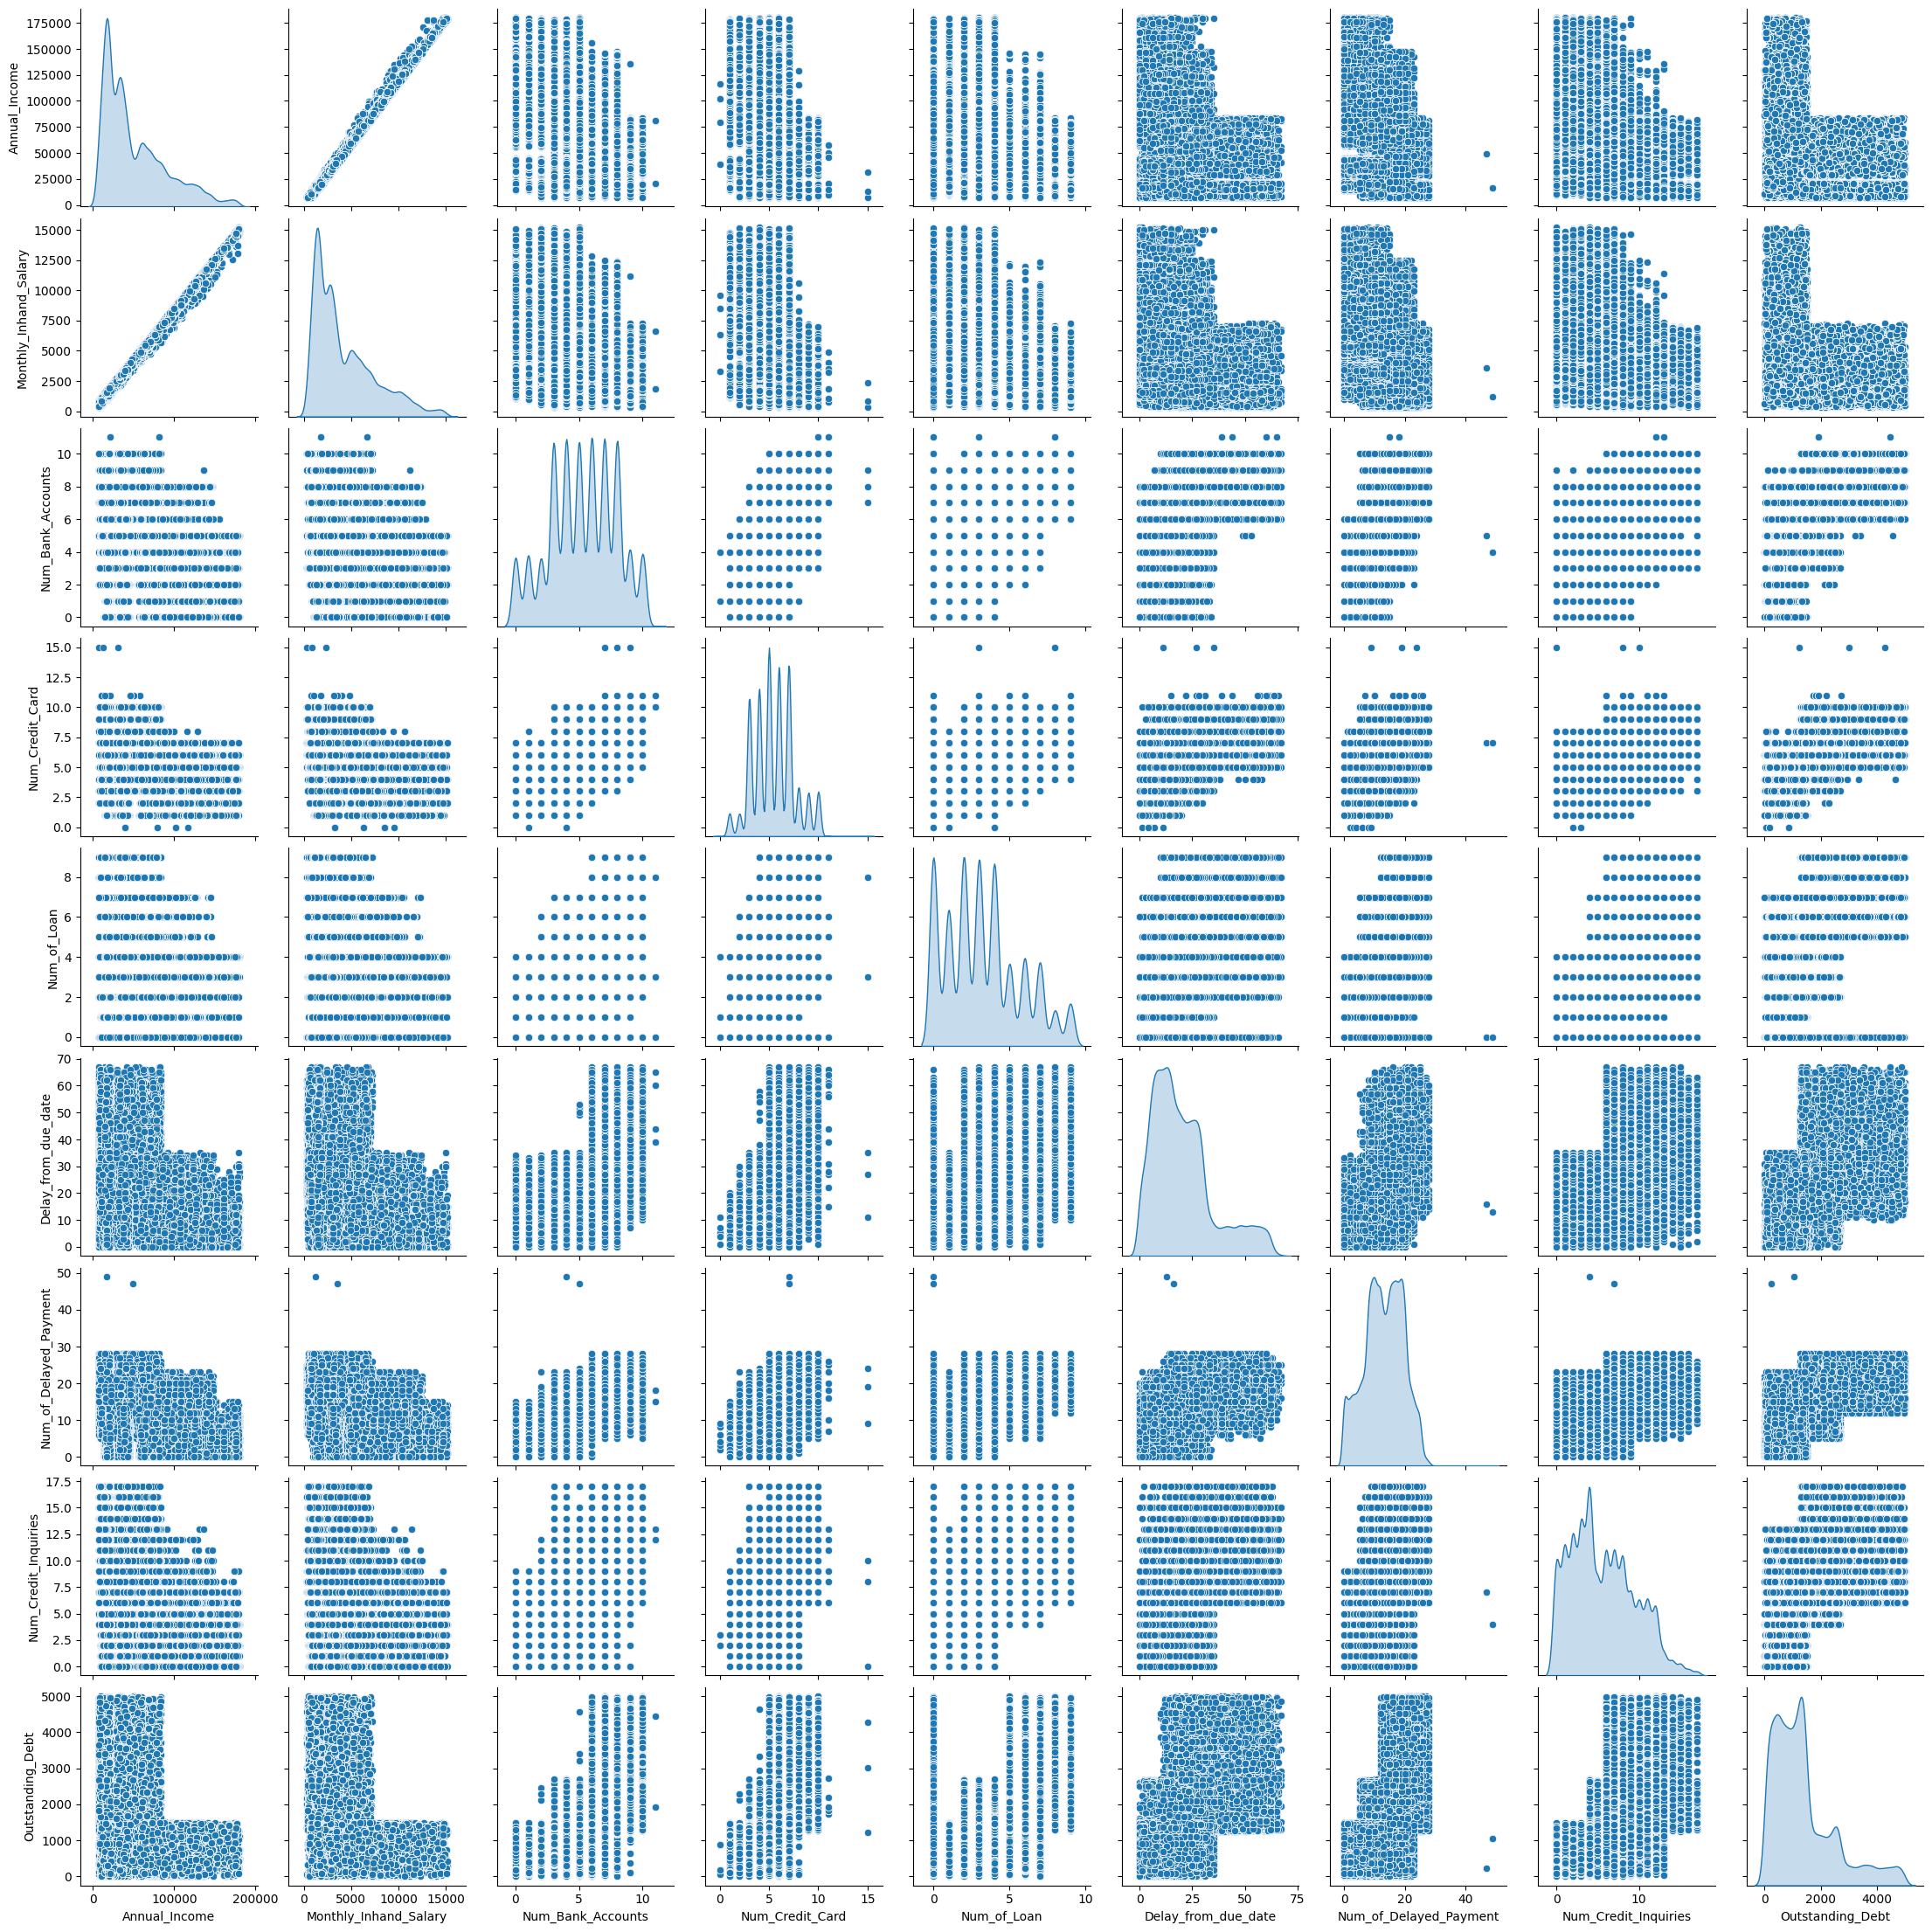

In [128]:
# pair plot
corr_cols = [
    'Annual_Income',
    'Monthly_Inhand_Salary',
    'Num_Bank_Accounts',
    'Num_Credit_Card',
    'Num_of_Loan',
    'Delay_from_due_date',
    'Num_of_Delayed_Payment',
    'Num_Credit_Inquiries',
    'Outstanding_Debt'
]
df_corr_cols = df_main.loc[:, corr_cols]
sns.pairplot(df_corr_cols, diag_kind='kde')

Outstanding_Debt has a semi linear correlation with the above features, which means sense intuitively as the more credit card and loan one has the more outstanding debt there will be, also more chances for delayed payments

**Let's see how the numeric fields affect Credit_Score, the prediction**

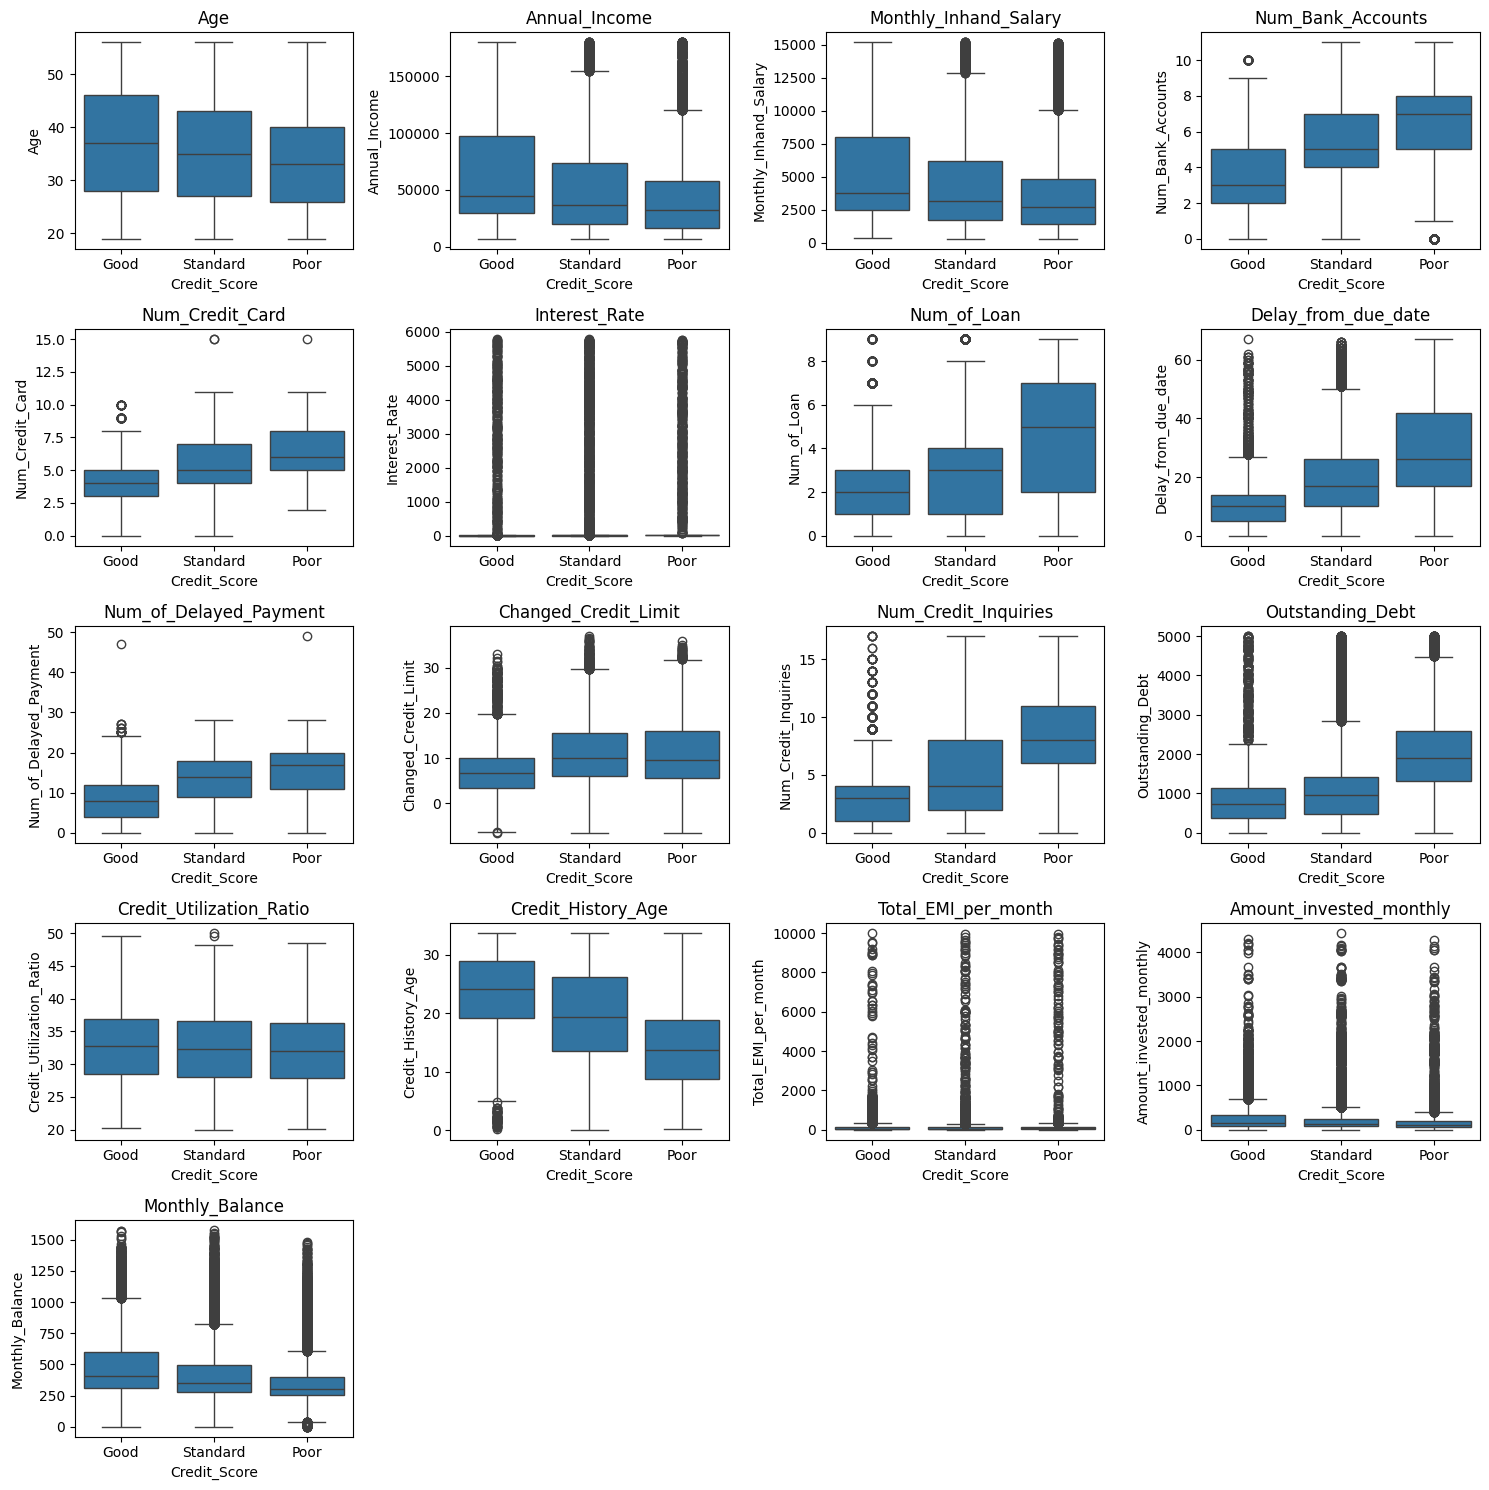

In [136]:
plt.figure(figsize=(15,15))
df_numeric_plus_score = df_numeric
df_numeric_plus_score['Credit_Score'] = df_main['Credit_Score']

for ax, col in enumerate(df_numeric_plus_score.columns[:-9]):
    plt.subplot(5,4, ax+1)
    plt.title(col)
    sns.boxplot(x='Credit_Score', y=col, data=df_numeric_plus_score)

plt.tight_layout()


#### Observations

1. **Changed_Credit_Limit** is correlated with many other features, and it doesn't have much effect on determining the Credit_Score, We will drop it
2. **Total_EMI_per_month** doesn't have much effect on Credit_Score and is broadly distrubuted, we will drop it
3. **Amount invested_monthly** also has little effect on credit_score and is broadly distrubuted, we will drop it
4. **Interest Rate** don't have any effect on Credit_Score, we will drop them
5. **Monthly_Inhand_Salary**, **Annual_Income**, and **Monthly_Balance** have similar effect on Credit_Score, earlier we saw they were closedly related, we will drop Monthly_Inhand_Salary
6. **Delay_from _due_date** and **Num_of_Delayed_Payment** have similar means, they are also strongly correlated (0.6), we will drop Delay_from _due_date
7. **Num_of_credit_Card** and **Num_of_bank_account** show week linear correlation
8. many outliers for **Outstanding_debt**

Outstanding_Debt
float64
[ 809.98  605.03 1303.01 ...  620.64 3571.7   502.38]
Outstanding_Debt
1109.03    20
1151.70    20
1360.45    19
460.46     18
1408.66    16
           ..
448.39      1
208.25      1
933.84      1
1129.87     1
455.55      1
Name: count, Length: 11283, dtype: int64
Number of rows: 71377
Number of rows with null value: 0
Max: 4998.070000, Min: 0.230000


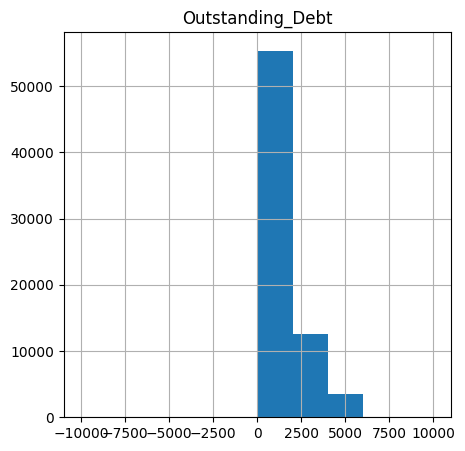

In [456]:
# taking a look at Outstanding_Debt
print_col_info('Outstanding_Debt')
print("Max: %f, Min: %f" % (df_main['Outstanding_Debt'].max(), df_main['Outstanding_Debt'].min()))
df_main.hist(column=['Outstanding_Debt'], figsize=(5, 5), range=[-10000, 10000])
plt.show()

In [457]:
df_main.drop([
    'Monthly_Balance', 
    'Monthly_Inhand_Salary', 
    'Changed_Credit_Limit', 
    'Total_EMI_per_month', 
    'Amount_invested_monthly', 
    'Interest_Rate',
    'Delay_from_due_date'
], axis=1, inplace=True)

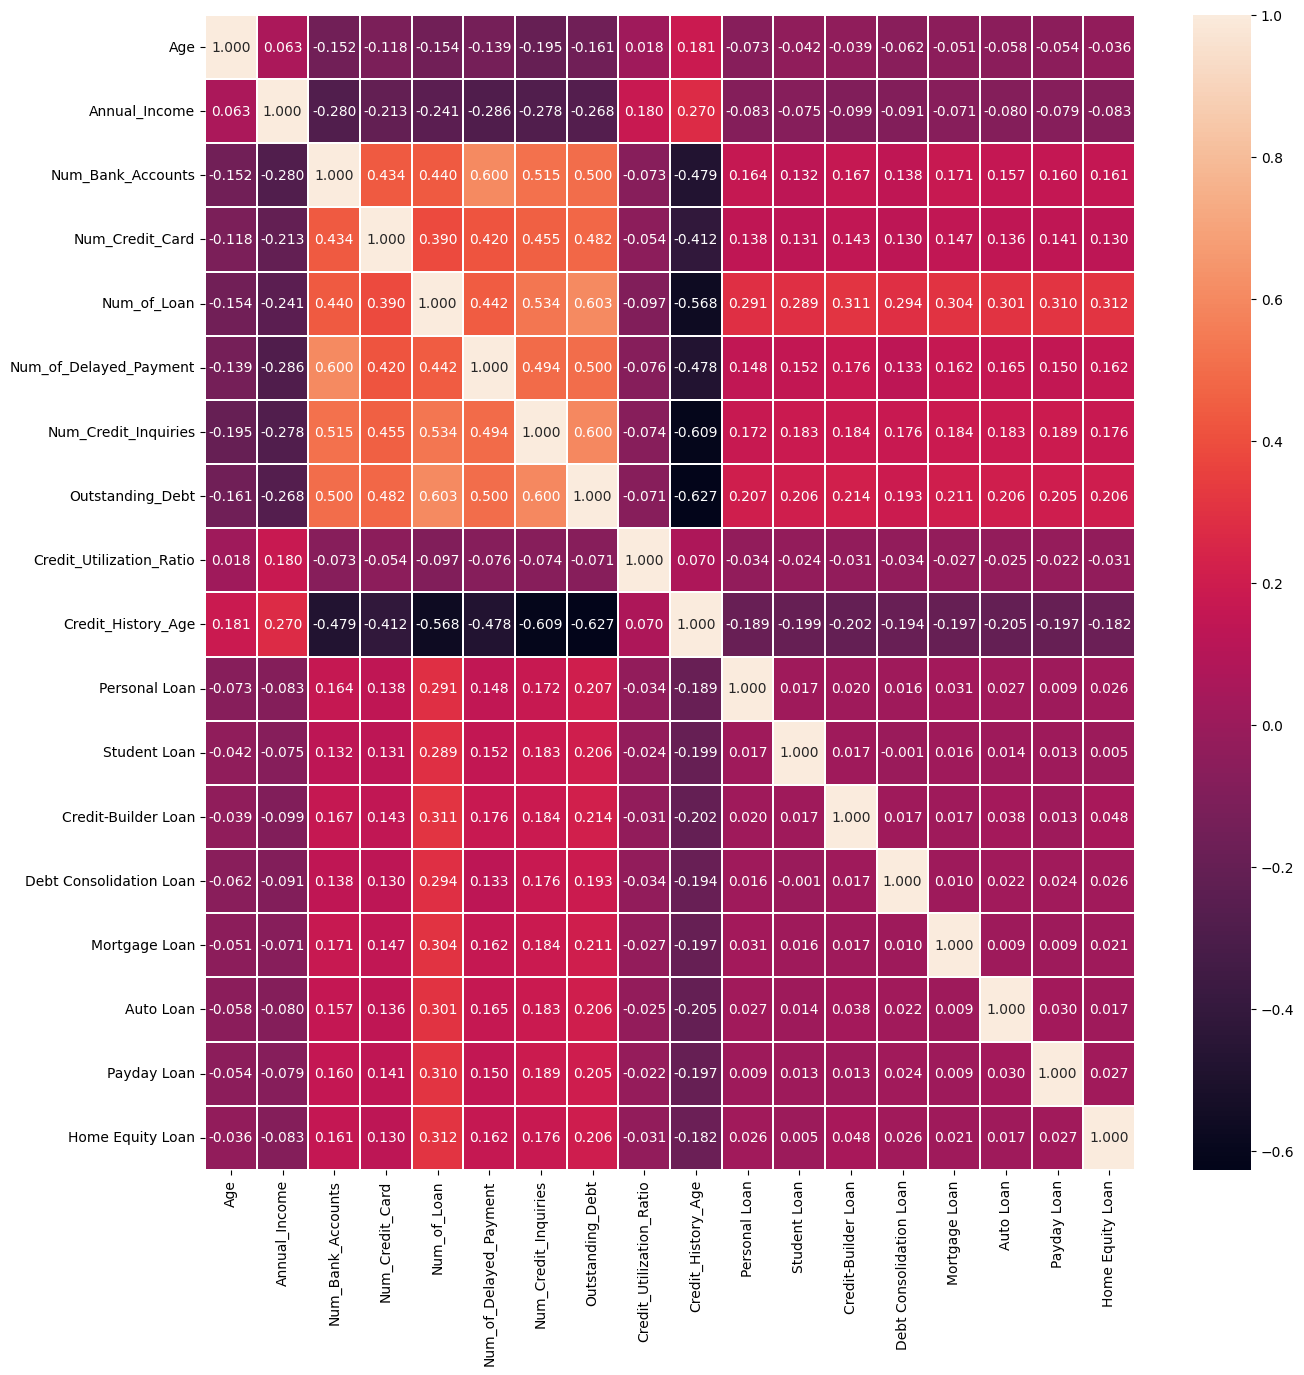

In [458]:
# checking heatmap one more time
df_numeric = df_main.select_dtypes(include = ['float','int'])
fig, ax = plt.subplots(figsize=(15,15))
sns.heatmap(df_numeric.corr(), annot=True, fmt=".3f", linewidth=.1, ax=ax);

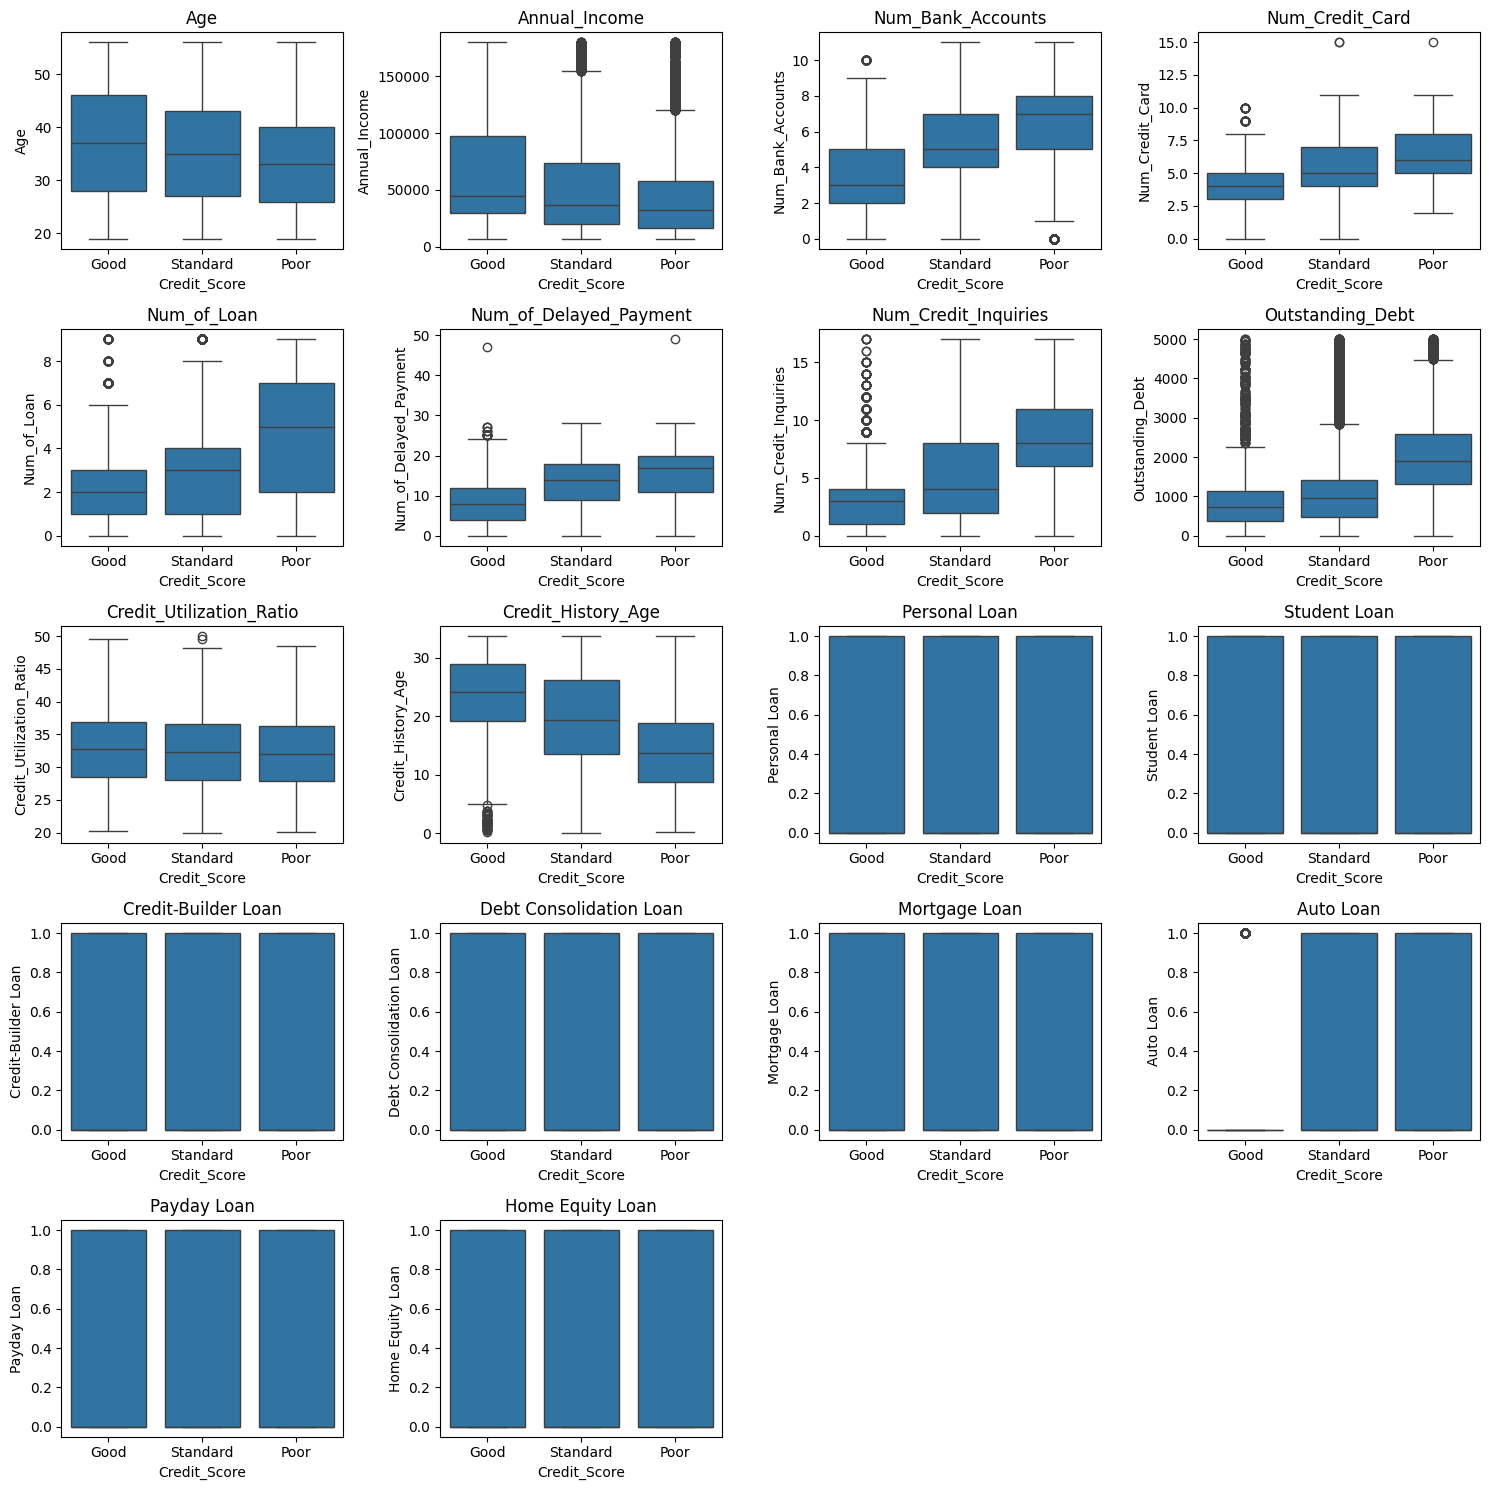

In [459]:
plt.figure(figsize=(15,15))
df_numeric_plus_score = df_numeric
df_numeric_plus_score['Credit_Score'] = df_main['Credit_Score']
for ax, col in enumerate(df_numeric_plus_score.columns[:-1]):
    plt.subplot(5,4, ax+1)
    plt.title(col)
    sns.boxplot(x='Credit_Score', y=col, data=df_numeric_plus_score)

plt.tight_layout()

### Categorical Data Analysis

In [460]:
df_main.select_dtypes(include='object').columns.tolist()

['ID',
 'Customer_ID',
 'Month',
 'Name',
 'SSN',
 'Occupation',
 'Credit_Mix',
 'Payment_of_Min_Amount',
 'Payment_Behaviour',
 'Credit_Score']

In [461]:
# First We will change Credit_Score to int
credit_map = {
    'Poor' : 0,
    'Standard' : 1,
    'Good' : 2
}

df_main['Credit_Score'] = df_main['Credit_Score'].map(credit_map)

In [462]:
# changing Credit_Mix as well, first let's examine the data agin
print_col_info('Credit_Mix')

Credit_Mix
object
['Good' 'Standard' 'Bad']
Credit_Mix
Standard    32453
Good        23155
Bad         15769
Name: count, dtype: int64
Number of rows: 71377
Number of rows with null value: 0


In [463]:
credit_mix_map = {
    'Bad' : 0,
    'Standard' : 1,
    'Good' : 2
}

df_main['Credit_Mix'] = df_main['Credit_Mix'].map(credit_mix_map)

In [464]:
# Changing Month
print_col_info('Month')

Month
object
['January' 'April' 'June' 'July' 'August' 'February' 'May' 'March']
Month
August      9041
July        9026
June        8978
May         8918
April       8880
March       8877
January     8859
February    8798
Name: count, dtype: int64
Number of rows: 71377
Number of rows with null value: 0


In [465]:
month_map = {
    'January': 1,
    'April': 4,
    'June': 6,
    'July': 7,
    'August': 8, 
    'February': 2, 
    'May': 5, 
    'March': 3
}

df_main['Month'] = df_main['Month'].map(month_map)

In [466]:
# Changing the other fields

other_cat_cols = [
 'Occupation',
 'Payment_of_Min_Amount',
 'Payment_Behaviour'
]

for col in other_cat_cols:
    df_main[col] = pd.factorize(df_main[col])[0]
    print_col_info(col)

Occupation
int64
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14]
Occupation
5     5134
12    4894
2     4827
0     4815
14    4806
10    4802
4     4800
8     4735
3     4709
6     4705
1     4700
7     4696
11    4621
9     4598
13    4535
Name: count, dtype: int64
Number of rows: 71377
Number of rows with null value: 0
Payment_of_Min_Amount
int64
[0 1]
Payment_of_Min_Amount
1    40402
0    30975
Name: count, dtype: int64
Number of rows: 71377
Number of rows with null value: 0
Payment_Behaviour
int64
[0 1 2 3 4 5]
Payment_Behaviour
1    19417
2    13949
3    11156
4    10453
0     8598
5     7804
Name: count, dtype: int64
Number of rows: 71377
Number of rows with null value: 0


In [467]:
# Next we will run square chi test which calculates which features are most likely to be 
# independent of class and therefore irrelevant for classification

cat_cols = [
 'Month',
 'Occupation',
 'Credit_Mix',
 'Payment_of_Min_Amount',
 'Payment_Behaviour'
]
chi2_stats, p_values = chi2(df_main.loc[:, cat_cols], df_main.loc[:, ['Credit_Score']])

for i in range(len(chi2_stats)):
    print (cat_cols[i] + ': chi2_stat - %.3f, p_value - %.3f' % (chi2_stats[i], p_values[i]))


Month: chi2_stat - 102.415, p_value - 0.000
Occupation: chi2_stat - 44.644, p_value - 0.000
Credit_Mix: chi2_stat - 9203.814, p_value - 0.000
Payment_of_Min_Amount: chi2_stat - 6746.641, p_value - 0.000
Payment_Behaviour: chi2_stat - 134.273, p_value - 0.000


In [468]:
# We will drop two features with the lowest chi square results

### Next we'll drop irrelevant features and duplicates

In [469]:
# dropping Month & Occupation per low chi square score
# as explained above, dropping Type_of_Loan is complicated and will be left out in this analysis
df_main.drop(['ID', 'Customer_ID', 'Name', 'SSN', 'Month', 'Occupation'], axis=1, inplace=True)
df_main.duplicated().any
df_main.dropna(inplace=True)

df_main.info()
df_main.head()

<class 'pandas.core.frame.DataFrame'>
Index: 62774 entries, 0 to 99999
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       62774 non-null  Int64  
 1   Annual_Income             62774 non-null  float64
 2   Num_Bank_Accounts         62774 non-null  int64  
 3   Num_Credit_Card           62774 non-null  int64  
 4   Num_of_Loan               62774 non-null  Int64  
 5   Num_of_Delayed_Payment    62774 non-null  Int64  
 6   Num_Credit_Inquiries      62774 non-null  float64
 7   Credit_Mix                62774 non-null  int64  
 8   Outstanding_Debt          62774 non-null  float64
 9   Credit_Utilization_Ratio  62774 non-null  float64
 10  Credit_History_Age        62774 non-null  float64
 11  Payment_of_Min_Amount     62774 non-null  int64  
 12  Payment_Behaviour         62774 non-null  int64  
 13  Credit_Score              62774 non-null  int64  
 14  Personal Lo

Age  Annual_Income  Num_Bank_Accounts  Num_Credit_Card  Num_of_Loan  \
0   23       19114.12                  3                4            4   
3   23       19114.12                  3                4            4   
5   23       19114.12                  3                4            4   
6   23       19114.12                  3                4            4   
7   23       19114.12                  3                4            4   

   Num_of_Delayed_Payment  Num_Credit_Inquiries  Credit_Mix  Outstanding_Debt  \
0                       7                   4.0           2            809.98   
3                       4                   4.0           2            809.98   
5                       4                   4.0           2            809.98   
6                       8                   4.0           2            809.98   
7                       6                   4.0           2            809.98   

   Credit_Utilization_Ratio  Credit_History_Age  Payment_of_Min_Amount  \
0                 26.822620               22.08                      0   
3                 31.377862               22.33                      0   
5                 27.262259               22.50                      0   
6                 22.537593               22.58                      0   
7                 23.933795               22.08                      0   

   Payment_Behaviour  Credit_Score  Personal Loan  Student Loan  \
0                  0             2            1.0           0.0   
3                  1             2            1.0           0.0   
5                  1             2            1.0           0.0   
6                  1             2            1.0           0.0   
7                  2             1            1.0           0.0   

   Credit-Builder Loan  Debt Consolidation Loan  Mortgage Loan  Auto Loan  \
0                  1.0                      0.0            0.0        1.0   
3                  1.0                      0.0            0.0        1.0   
5                  1.0                      0.0            0.0        1.0   
6                  1.0                      0.0            0.0        1.0   
7                  1.0                      0.0            0.0        1.0   

   Payday Loan  Home Equity Loan  
0          0.0               1.0  
3          0.0               1.0  
5          0.0               1.0  
6          0.0               1.0  
7          0.0               1.0

## Models

In [470]:
# store all model metrics in an array
all_model_metrics = {};

# helper function to calculate model result metrics

def show_model_metrics(name, y_true, y_pred, running_time=np.nan, cal_confusion_matrix=True):
    # accuracy
    accuracy = accuracy_score(y_true, y_pred)
    print('Accuracy: %f' % accuracy)
    
    # precision
    precision = precision_score(y_true, y_pred, average='weighted')
    print('Precision: %f' % precision)

    # recall
    recall = recall_score(y_true, y_pred, average='weighted')
    print('Recall: %f' % recall)

    # f1
    f1 = f1_score(y_true, y_pred, average='weighted')
    print('f1: %f' % f1)

    all_model_metrics[name] = {'accuracy': accuracy, 'precision': precision, 'recall': recall, 'f1': f1, 'running_time': running_time}

    # confusion matrix
    if (cal_confusion_matrix):
        print('Calculating confusion matrix, may take awhile...')
        cm = confusion_matrix(y_true, y_pred);
        disp = ConfusionMatrixDisplay(confusion_matrix = cm)
        disp.plot()
        plt.show()



def multi_ROC_Curve(y_score):

    """
        Creating ROC Curve, code copied from sklearn guide
        y_score obtained from calling Classifier.predict_proba(data.x_test)

        returns roc_auc_score for all classes

    """
    
    label_binarizer = LabelBinarizer().fit(data.y_train)
    y_onehot_test = label_binarizer.transform(data.y_test)
    y_onehot_test.shape  # (n_samples, n_classes)

    aucs = [];
    for class_id in range(3):
        aucs.append(roc_auc_score(y_onehot_test[:, class_id], y_score[:, class_id]))
        display = RocCurveDisplay.from_predictions(
            y_onehot_test[:, class_id],
            y_score[:, class_id],
            name=f"{predict_labels[class_id]} vs the rest",
            color="darkorange",
            plot_chance_level=True,
        )
        _ = display.ax_.set(
            xlabel="False Positive Rate (FPR)",
            ylabel="True Positive Rate (TPR)",
            title=f"One-vs-Rest ROC curves:\n{predict_labels[class_id]} vs Rest",
        )

    return aucs;

In [471]:
class ModelData:
    """
     Set up data 
    """
    def __init__(self):

        # feature and target variables
        y = df_main['Credit_Score'].values
        X = df_main.drop('Credit_Score', axis=1).values
        
        # create training and validation sets 
        self.x_train, self.x_test, self.y_train, self.y_test = train_test_split(X, y, test_size=0.25, random_state=5);

data = ModelData()
predict_labels = ['Poor', 'Standard', 'Good']

## 1. Logistic Regression

Accuracy: 0.591691
Precision: 0.585238
Recall: 0.591691
f1: 0.571191
Calculating confusion matrix, may take awhile...


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


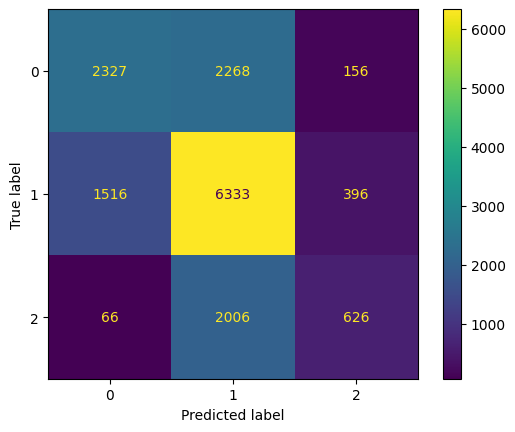

In [472]:
start = datetime.now()
LogRegModel = LogisticRegression(random_state=0, max_iter=1000)
LogRegModel.fit(data.x_train, data.y_train)
y_ped = LogRegModel.predict(data.x_test)
running_time = (datetime.now() - start).seconds

y_score = LogRegModel.predict_proba(data.x_test)

show_model_metrics('Logistic Regression', data.y_test, y_ped, running_time = running_time)

[0.7619571637289364, 0.6572851932457469, 0.8276247569817343]


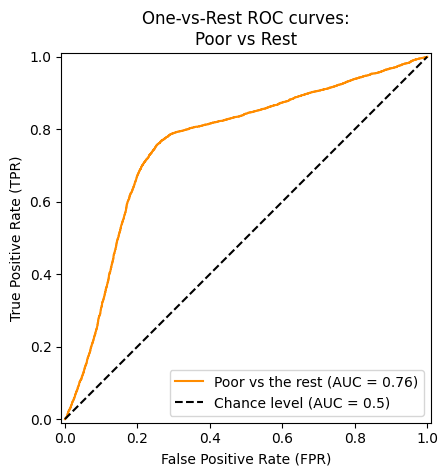

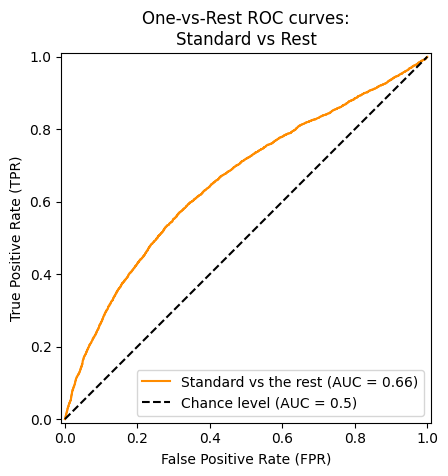

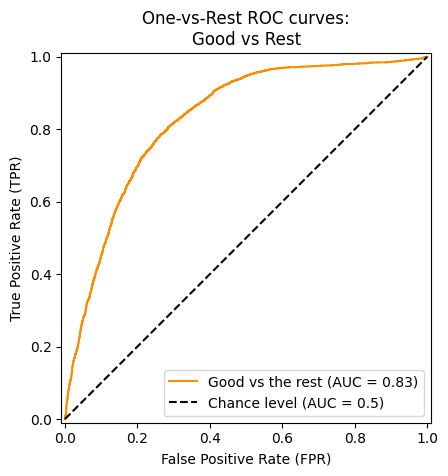

In [473]:
# checking auc score
aucs = multi_ROC_Curve(y_score);
all_model_metrics['Logistic Regression']['AUC'] = aucs
print(aucs);

#### Logistic Regression has the AUC (high TTR and low FPR) at predicting poor and good credit score

## 2. K-nearest neighbors

Accuracy: 0.760673
Precision: 0.760783
Recall: 0.760673
f1: 0.760287
Calculating confusion matrix, may take awhile...


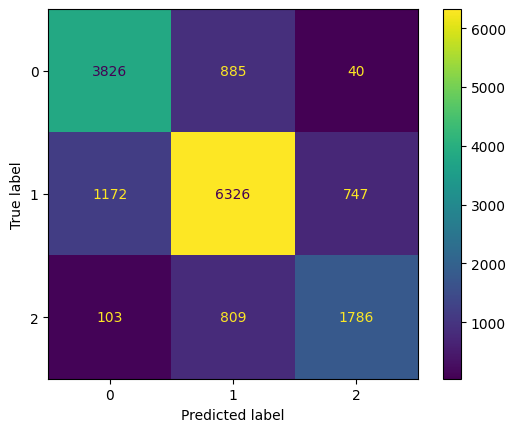

In [474]:
# Check for accuracy, displaying confusion matrix, K=5 by default
# Predicted label: (0: Poor, 1: Standard, 2: Good)

start = datetime.now();
KNNModel = KNeighborsClassifier(n_neighbors=5)
KNNModel.fit(data.x_train, data.y_train)
y_ped = KNNModel.predict(data.x_test)
running_time = (datetime.now() - start).seconds

y_score = KNNModel.predict_proba(data.x_test)

show_model_metrics('KNN', data.y_test, y_ped, running_time = running_time)

[0.9178001128020432, 0.8333137947706828, 0.9251065960650263]


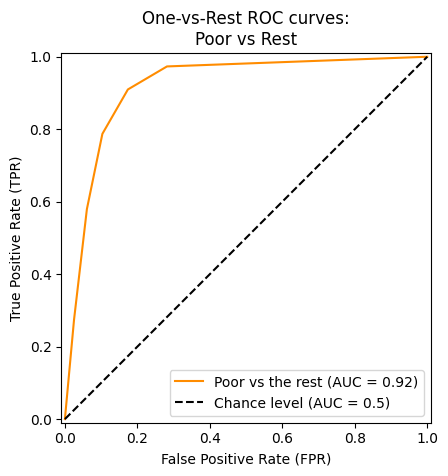

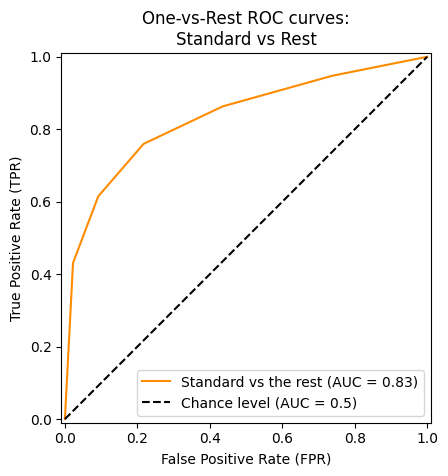

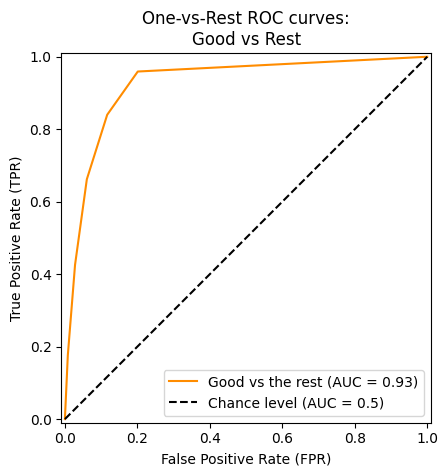

In [475]:
# checking auc score
aucs = multi_ROC_Curve(y_score);
all_model_metrics['KNN']['AUC'] = aucs
print(aucs);

## 3. Decision Tree

In [476]:
DTModel = DecisionTreeClassifier()
DTModel.fit(data.x_train, data.y_train)
y_pred = DTModel.predict(data.x_test)
show_model_metrics('Decision Tree', data.y_test, y_pred, cal_confusion_matrix=False)
print('Decision Tree depth: %d\n' % DTModel.get_depth())
print('Number of leaves: %d\n' % DTModel.get_n_leaves())

Accuracy: 0.735440
Precision: 0.735915
Recall: 0.735440
f1: 0.735641
Decision Tree depth: 38

Number of leaves: 9689



In [477]:
# That's mny leaves, lets's try making number of leaves smaller
for i in range(500, 6000, 500):
    print('Max leaf nodes: %d' % i)
    DTModel = DecisionTreeClassifier(max_leaf_nodes=i)
    DTModel.fit(data.x_train, data.y_train)
    y_pred = DTModel.predict(data.x_test)
    show_model_metrics('Decision Tree', data.y_test, y_pred, cal_confusion_matrix=False)
    print('Decision Tree depth: %d\n' % DTModel.get_depth())

Max leaf nodes: 500
Accuracy: 0.731872
Precision: 0.735806
Recall: 0.731872
f1: 0.732731
Decision Tree depth: 27

Max leaf nodes: 1000
Accuracy: 0.751370
Precision: 0.752615
Recall: 0.751370
f1: 0.751626
Decision Tree depth: 31

Max leaf nodes: 1500
Accuracy: 0.761692
Precision: 0.762528
Recall: 0.761692
f1: 0.761830
Decision Tree depth: 32

Max leaf nodes: 2000
Accuracy: 0.764369
Precision: 0.765064
Recall: 0.764369
f1: 0.764440
Decision Tree depth: 32

Max leaf nodes: 2500
Accuracy: 0.760673
Precision: 0.761021
Recall: 0.760673
f1: 0.760740
Decision Tree depth: 33

Max leaf nodes: 3000
Accuracy: 0.759526
Precision: 0.759963
Recall: 0.759526
f1: 0.759659
Decision Tree depth: 33

Max leaf nodes: 3500
Accuracy: 0.756213
Precision: 0.756553
Recall: 0.756213
f1: 0.756323
Decision Tree depth: 33

Max leaf nodes: 4000
Accuracy: 0.754683
Precision: 0.754807
Recall: 0.754683
f1: 0.754717
Decision Tree depth: 34

Max leaf nodes: 4500
Accuracy: 0.754620
Precision: 0.754797
Recall: 0.754620
f1: 

Accuracy: 0.764815
Precision: 0.765530
Recall: 0.764815
f1: 0.764885
Calculating confusion matrix, may take awhile...


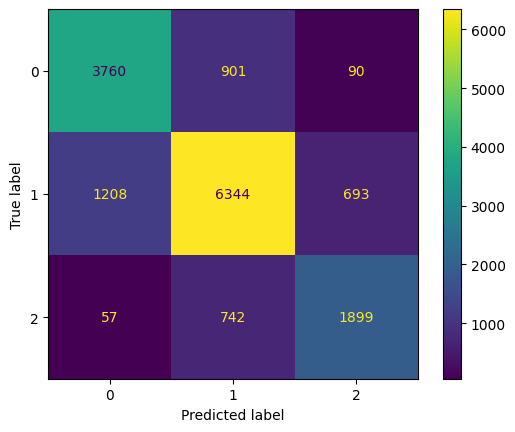

Decision Tree depth: 32



In [478]:
# Looks like we achieved higher accuracy when Max # of leaves is set to 2000
start = datetime.now()
DTModel = DecisionTreeClassifier(max_leaf_nodes=2000)
DTModel.fit(data.x_train, data.y_train)
y_pred = DTModel.predict(data.x_test)
running_time = (datetime.now() - start).seconds
show_model_metrics('Decision Tree', data.y_test, y_pred, running_time=running_time, cal_confusion_matrix=True)
print('Decision Tree depth: %d\n' % DTModel.get_depth())

Number of nodes in the last tree is: 1 with ccp_alpha: 0.07394449186015173


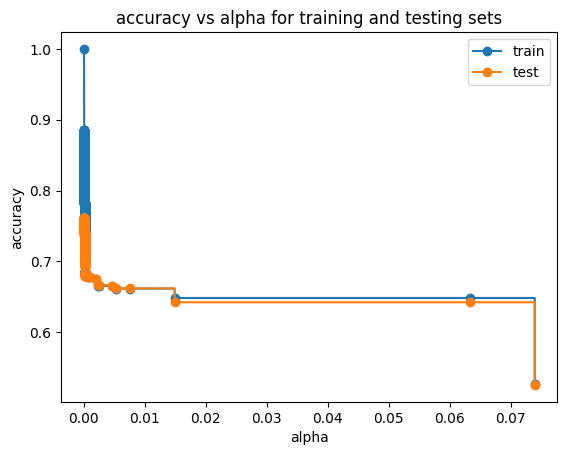

In [479]:
# Here we will use sklearn's cost complexity pruning parameter to impove performance
# We will iterate over different ccp_alpha values to see how accuracy is affected

# This algorithm is taken from assignment #4, THIS TAKES AWHILE


path = DTModel.cost_complexity_pruning_path(data.x_train,data.y_train) #post pruning
ccp_alphas, impurities = path.ccp_alphas, path.impurities

clfs = [] # VECTOR CONTAINING CLASSIFIERS FOR DIFFERENT ALPHAS

for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(data.x_train, data.y_train);
    clfs.append(clf);
    
print("Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
      clfs[-1].tree_.node_count, ccp_alphas[-1]))

# generate the train and test scores and plot the variation in these scores with increase in ccp_alpha
train_scores = [clf.score(data.x_train, data.y_train) for clf in clfs];
test_scores = [clf.score(data.x_test, data.y_test) for clf in clfs];

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker='o', label="train",
        drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='o', label="test",
        drawstyle="steps-post")
ax.legend()
plt.show() 

In [480]:
max_test_score_indx = pd.Series(test_scores).idxmax()
best_ccp_alpha = float('{:.4f}'.format(ccp_alphas[max_test_score_indx]))
print(best_ccp_alpha)

0.0001


Accuracy: 0.745890
Precision: 0.746914
Recall: 0.745890
f1: 0.746011
Calculating confusion matrix, may take awhile...


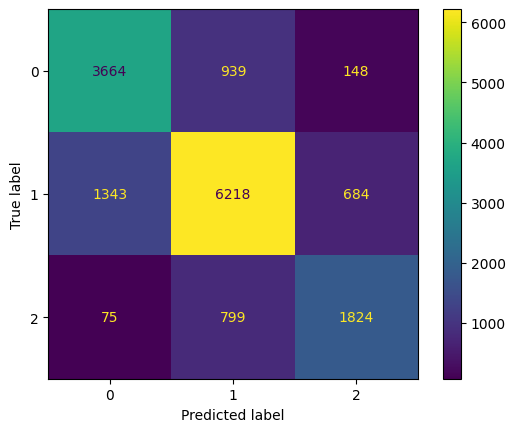

Decision Tree depth: 31



In [481]:
ccp_alpha = 0.0001
DTModel = DecisionTreeClassifier(max_leaf_nodes=1500, ccp_alpha = ccp_alpha)
DTModel.fit(data.x_train, data.y_train)
y_pred = DTModel.predict(data.x_test)
show_model_metrics('Decision Tree', data.y_test, y_pred, cal_confusion_matrix=True)
print('Decision Tree depth: %d\n' % DTModel.get_depth())

Accuracy: 0.761820
Precision: 0.762638
Recall: 0.761820
f1: 0.761947
Calculating confusion matrix, may take awhile...


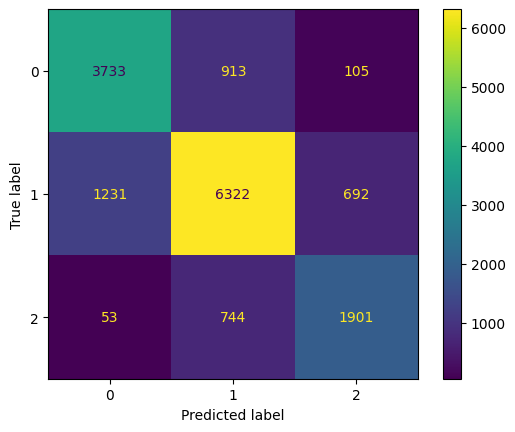

Decision Tree depth: 32



In [482]:
# Looks like pruning doesn't help with the accuracy of the model, so we will stick to no pruning
start = datetime.now()
DTModel = DecisionTreeClassifier(max_leaf_nodes=1500)
DTModel.fit(data.x_train, data.y_train)
y_pred = DTModel.predict(data.x_test)
running_time = (datetime.now() - start).seconds

y_score = DTModel.predict_proba(data.x_test)

show_model_metrics('Decision Tree', data.y_test, y_pred, running_time = running_time, cal_confusion_matrix=True)
print('Decision Tree depth: %d\n' % DTModel.get_depth())

[0.8801121396106377, 0.8017498248245742, 0.9000793224624511]


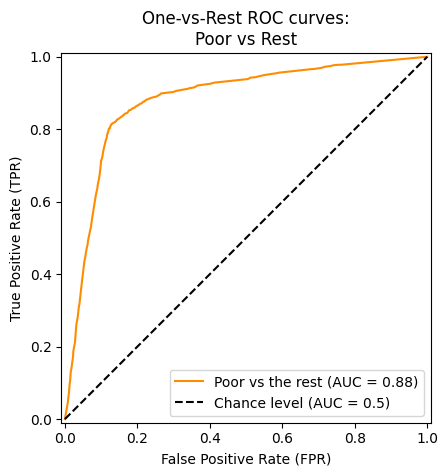

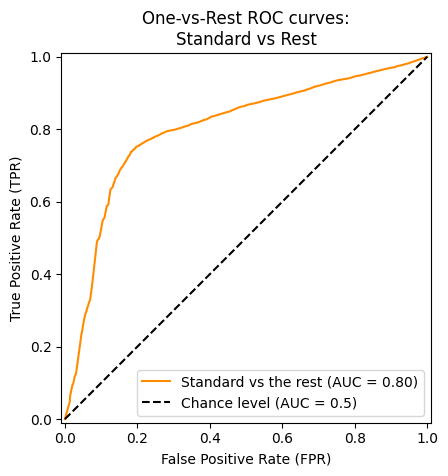

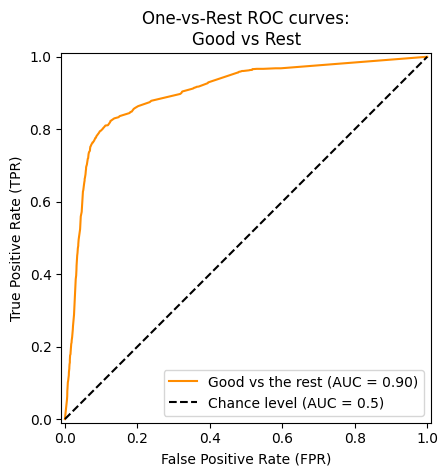

In [483]:
# checking auc score
aucs = multi_ROC_Curve(y_score);
all_model_metrics['Decision Tree']['AUC'] = aucs
print(aucs);

## 4. Decision Tree with AdaBoost

Accuracy: 0.644705
Precision: 0.653091
Recall: 0.644705
f1: 0.646775
Calculating confusion matrix, may take awhile...


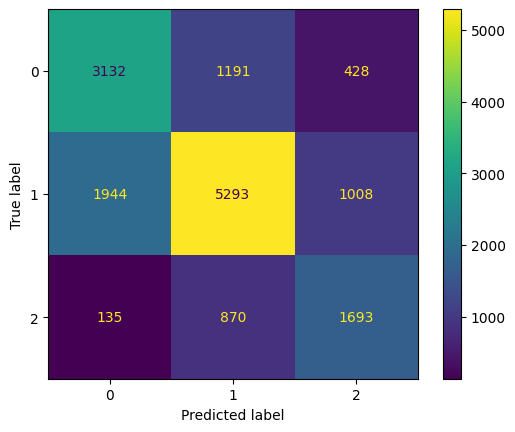

In [484]:
AdaModel = AdaBoostClassifier(n_estimators=100, algorithm='SAMME', random_state=0)
AdaModel.fit(data.x_train, data.y_train)
y_pred = AdaModel.predict(data.x_test)

show_model_metrics('AdaBoost', data.y_test, y_pred)

In [485]:
# trying different number of estimators

for i in range(100, 1000, 100):
    print('\nNumber of Estimators: %d' % i)
    AdaModel = AdaBoostClassifier(n_estimators=i, algorithm='SAMME', random_state=0)
    AdaModel.fit(data.x_train, data.y_train)
    y_pred = AdaModel.predict(data.x_test)
    show_model_metrics('AdaBoost', data.y_test, y_pred, cal_confusion_matrix=False)


Number of Estimators: 100
Accuracy: 0.644705
Precision: 0.653091
Recall: 0.644705
f1: 0.646775

Number of Estimators: 200
Accuracy: 0.645470
Precision: 0.653133
Recall: 0.645470
f1: 0.647559

Number of Estimators: 300
Accuracy: 0.646680
Precision: 0.653954
Recall: 0.646680
f1: 0.648609

Number of Estimators: 400
Accuracy: 0.647317
Precision: 0.654284
Recall: 0.647317
f1: 0.649150

Number of Estimators: 500
Accuracy: 0.646935
Precision: 0.653452
Recall: 0.646935
f1: 0.648591

Number of Estimators: 600
Accuracy: 0.646871
Precision: 0.653439
Recall: 0.646871
f1: 0.648548

Number of Estimators: 700
Accuracy: 0.646871
Precision: 0.653439
Recall: 0.646871
f1: 0.648548

Number of Estimators: 800
Accuracy: 0.649420
Precision: 0.655704
Recall: 0.649420
f1: 0.650897

Number of Estimators: 900
Accuracy: 0.649102
Precision: 0.655095
Recall: 0.649102
f1: 0.650454


Accuracy: 0.644705
Precision: 0.653091
Recall: 0.644705
f1: 0.646775
Calculating confusion matrix, may take awhile...


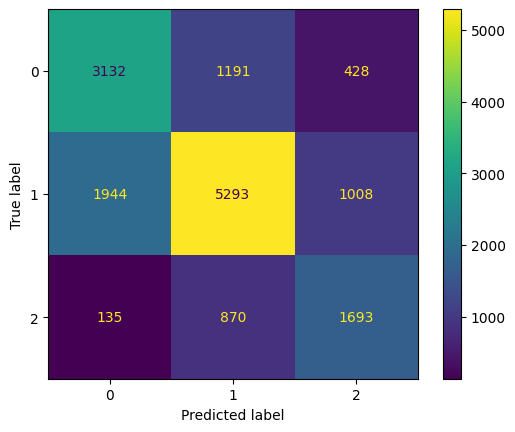

In [486]:
# As the metrics don't improve too much we will keep number of estimators at 100
start = datetime.now();
AdaModel = AdaBoostClassifier(n_estimators=100, algorithm='SAMME', random_state=0)
AdaModel.fit(data.x_train, data.y_train)
y_pred = AdaModel.predict(data.x_test)
running_time = (datetime.now() - start).seconds

y_score = AdaModel.predict_proba(data.x_test)

show_model_metrics('AdaBoost', data.y_test, y_pred, running_time = running_time)

[0.8088589611506155, 0.7254145329945673, 0.873302651029535]


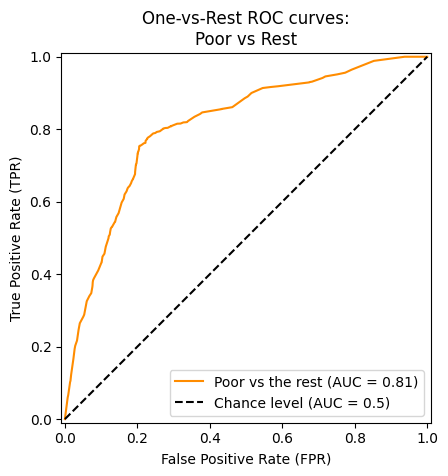

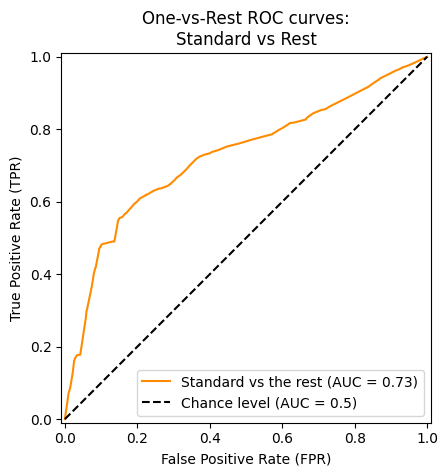

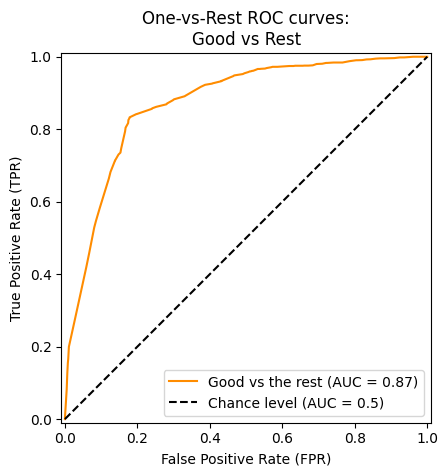

In [487]:
# checking auc score
aucs = multi_ROC_Curve(y_score);
all_model_metrics['AdaBoost']['AUC'] = aucs
print(aucs);

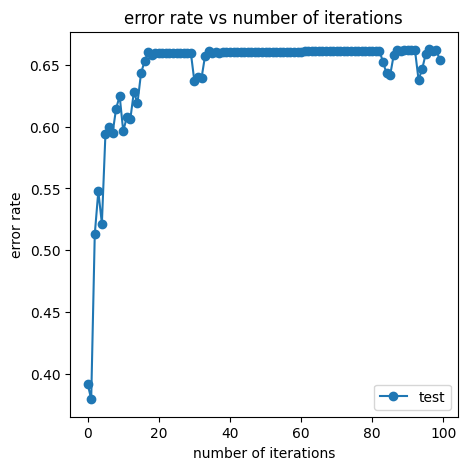

In [488]:
# plot misclassification error 

fig, ax = plt.subplots(figsize=(5,5))
ax.set_xlabel("number of iterations")
ax.set_ylabel("error rate")
ax.set_title("error rate vs number of iterations")

ax.plot(range(AdaModel.n_estimators), AdaModel.estimator_errors_, marker='o', label="test")

ax.legend()
plt.show() 

## 5. Decision Tree with Random Forest

Number of Estimators: 100
Accuracy: 0.796037
Precision: 0.796197
Recall: 0.796037
f1: 0.796025
Calculating confusion matrix, may take awhile...


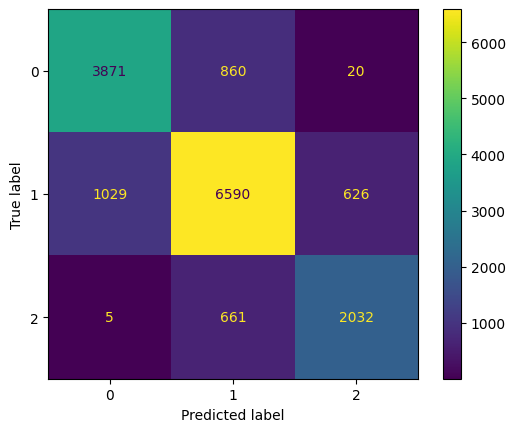

In [489]:
RFModel = RandomForestClassifier(oob_score=True, random_state=0)
RFModel.fit(data.x_train, data.y_train)
y_pred = RFModel.predict(data.x_test)

print('Number of Estimators: %d' % len(RFModel.estimators_))
show_model_metrics('Random Forest', data.y_test, y_pred)

In [490]:
# Using GridSearchCV to find optimal parameters
# Taking too long, out of memeory

"""
params = {'C': np.logspace(-5, 5, base=2, num=11), 'gamma': np.logspace(-5, 5, base=2, num=11)}
grid=GridSearchCV(SVC(kernel='rbf'), params, cv=3)
grid.fit(data.x_train, data.y_train)
print('Best parameters: ', grid.best_params_)
"""

"\nparams = {'C': np.logspace(-5, 5, base=2, num=11), 'gamma': np.logspace(-5, 5, base=2, num=11)}\ngrid=GridSearchCV(SVC(kernel='rbf'), params, cv=3)\ngrid.fit(data.x_train, data.y_train)\nprint('Best parameters: ', grid.best_params_)\n"

In [491]:
# Trying a few sample sizes
for percent in range(1, 8):
    sample_size = int(percent * 0.1 * len(data.x_train));
    print("\nSample Size: %d" % sample_size);
    RFModel = RandomForestClassifier(n_estimators=100, max_depth=2000, max_leaf_nodes=2000, random_state=0, max_samples=sample_size)
    RFModel.fit(data.x_train, data.y_train)
    y_pred = RFModel.predict(data.x_test)
    y_score = RFModel.predict_proba(data.x_test)

    show_model_metrics('Random Forest', data.y_test, y_pred, cal_confusion_matrix=False)


Sample Size: 4708
Accuracy: 0.743915
Precision: 0.747833
Recall: 0.743915
f1: 0.745019

Sample Size: 9416
Accuracy: 0.763604
Precision: 0.765936
Recall: 0.763604
f1: 0.764308

Sample Size: 14124
Accuracy: 0.772142
Precision: 0.773811
Recall: 0.772142
f1: 0.772673

Sample Size: 18832
Accuracy: 0.777941
Precision: 0.779665
Recall: 0.777941
f1: 0.778456

Sample Size: 23540
Accuracy: 0.781063
Precision: 0.782908
Recall: 0.781063
f1: 0.781527

Sample Size: 28248
Accuracy: 0.783548
Precision: 0.785082
Recall: 0.783548
f1: 0.783930

Sample Size: 32956
Accuracy: 0.785396
Precision: 0.786898
Recall: 0.785396
f1: 0.785788


Number of Estimators: 100
Accuracy: 0.796037
Precision: 0.796197
Recall: 0.796037
f1: 0.796025
Calculating confusion matrix, may take awhile...


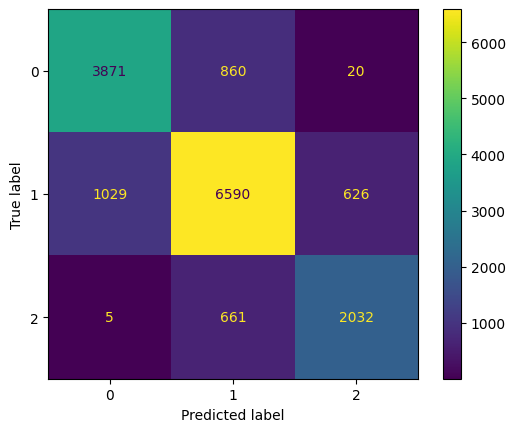

In [492]:
# the default parameters yield the best result

start = datetime.now()
RFModel = RandomForestClassifier(oob_score=True, random_state=0)
RFModel.fit(data.x_train, data.y_train)
y_pred = RFModel.predict(data.x_test)
running_time = (datetime.now() - start).seconds

y_score = AdaModel.predict_proba(data.x_test)

print('Number of Estimators: %d' % len(RFModel.estimators_))
show_model_metrics('Random Forest', data.y_test, y_pred, running_time=running_time)

[0.8088589611506155, 0.7254145329945673, 0.873302651029535]


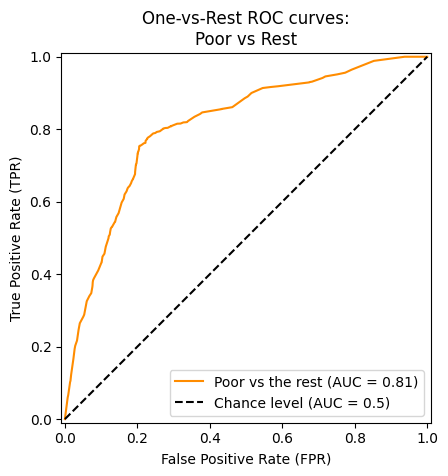

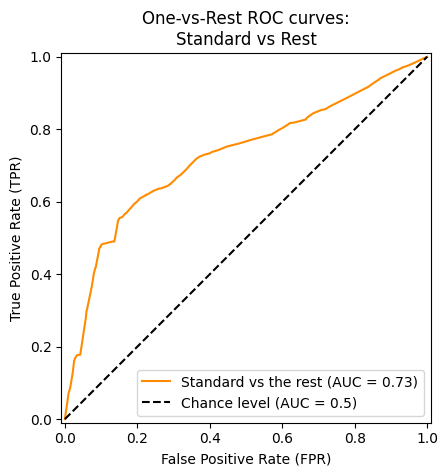

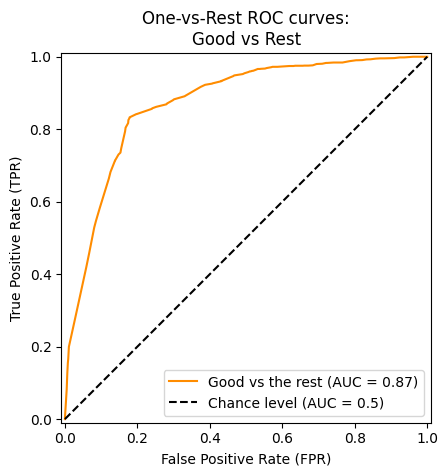

In [493]:
# checking auc score
aucs = multi_ROC_Curve(y_score);
all_model_metrics['Random Forest']['AUC'] = aucs
print(aucs);

# Conclusions

In [494]:
# First let's take a look at the metrics for all models

for model_name in all_model_metrics:
    print('\n')
    print(model_name)
    metrics = all_model_metrics[model_name]
    for m_name in metrics:
        print(m_name, end =': ')
        print(metrics[m_name])





Logistic Regression
accuracy: 0.5916910921371225
precision: 0.5852380707702225
recall: 0.5916910921371225
f1: 0.5711908121855875
running_time: 6
AUC: [0.7619571637289364, 0.6572851932457469, 0.8276247569817343]


KNN
accuracy: 0.7606728686122085
precision: 0.7607827404973633
recall: 0.7606728686122085
f1: 0.7602869085292241
running_time: 0
AUC: [0.9178001128020432, 0.8333137947706828, 0.9251065960650263]


Decision Tree
accuracy: 0.7618198037466548
precision: 0.7626377648389755
recall: 0.7618198037466548
f1: 0.7619469794768291
running_time: 0
AUC: [0.8801121396106377, 0.8017498248245742, 0.9000793224624511]


AdaBoost
accuracy: 0.644704982795973
precision: 0.6530913389871311
recall: 0.644704982795973
f1: 0.6467748870109026
running_time: 9
AUC: [0.8088589611506155, 0.7254145329945673, 0.873302651029535]


Random Forest
accuracy: 0.7960367019243023
precision: 0.7961967263140217
recall: 0.7960367019243023
f1: 0.7960247444032434
running_time: 5
AUC: [0.8088589611506155, 0.725414532994567

## Observations
1. Logistics Regression achieved the lowest scores across the board, but the AUC scores are similar to other models
2. Decision Tree with Random Forest ensemble has the highest accuracy and f1, but the AUC scores of decision tree without ensembling is slightly higher
3. KNN has the highest AUC scores, and its other scores are pretty good in comparison as well
4. AdaBoost takes the longest time to run, KNN and Decision Tree are much faster


**In conclusion, KNN model is the best model for this problem of predicting credit score, second is Decision Tree**